# Laboratorium 2 Klasyfikacja algorytmem k-najbliższych sąsiadów

## 0. Wstęp i inicjalizacja projektu

### 0.1 Wstęp

Celem laboratorium jest dokonanie licznych eksperymentów z algorytmem k-najbliższych sąsiadów.

Zostaną przeprowadzone liczne eksperymenty testujące wpływ odpowiednich hiperparametrów na zdolności algorymu.

Użytymi zbiorami danych będą Iris, Wine oraz Polish Bankruptcy Companies.

Wyniki będą analizowane na podstawie macierzy pomyłek, accuracy, recall, precision oraz F1 score.

Dodatkowym aspektem eksperymentów będzie wprowadzenie cross-validation, alternatywnej metody podziału zbioru na treningowy oraz testowy według k-foldów.


### 0.2 Inicjalizacja projektu

Do przeprowadzenia projektu konieczne są biblioteki:
1. ucimlrepo - pobranie zbioru danych
2. pandas - analiza tabelaryczna danych
3. numpy - operacje na macierzach
4. matplotlib/seaborn - wizualizacja analizy danych w formie wykresów
5. sklearn - zbiory danych oraz klasyfikator KNN

In [333]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import KFold, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## 1. Uruchomienie k-nn dla trzech badanych zbiorów

### 1. IRIS

In [81]:
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target

#### 1. Uruchomienie algorytmu klasyfikacji k-nn dla zbioru IRIS

[Na podstawie dokumentacji](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) upewniono się, iż domyślne argumenty dla knn to:

1. n_neighbors = 5
2. metric = 'minkowski'
3. p = 2  - nadaje starndardową odległość euklidesową, parametr do odległości minkowskiego

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

### 2. Implementacja miar jakości klasyfikacji: Precision, Recall, F-Score i Accuracy.

Dokonano manualnej implementacji metryk TruePositive, TrueNegative, FalsePositive oraz FalseNegative.

Po wypisniu ich oraz sprawdzeniu wyników z funkcją *sklearn.metrics.confusion_matrix()* wyniki okazały się być poprawne.

In [299]:
TPs = [np.sum((y_hat == i) & (y_test == i)) for i in range(3)]
TNs = [np.sum((y_hat != i) & (y_test != i)) for i in range(3)]
FPs = [np.sum((y_hat == i) & (y_test != i)) for i in range(3)]
FNs = [np.sum((y_hat != i) & (y_test == i)) for i in range(3)]
print(f'TP: {TPs}, TN: {TNs}, FP: {FPs}, FN: {FNs}')

TP: [9, 9, 10], TN: [21, 19, 18], FP: [0, 1, 1], FN: [0, 1, 1]


Dokonano manualnej implementacji metryk precision, recall oraz F1.

Po wypisaniu wyników oraz porównaniu z wynikami w *sklearn.metrics.classification_report* wyniki okazały się być poprawne.

In [300]:
precisions = [TPs[i] / (TPs[i] + FPs[i]) for i in range(3)]
recalls = [TPs[i] / (TPs[i] + FNs[i]) for i in range(3)]
f1s = [2 * TPs[i] / (2 * TPs[i] + FNs[i] + FPs[i]) for i in range(3)]
print(f'precisions: {precisions}, recalls: {recalls}, f1s: {f1s}')

precisions: [1.0, 0.9, 0.9090909090909091], recalls: [1.0, 0.9, 0.9090909090909091], f1s: [1.0, 0.9, 0.9090909090909091]


#### 3. Analiza macierzy pomyłek oraz metryk dla eksperymentu

Dokonano implementacji uniwersalnej funnkcji plot_cm, która w przyszłości może zostać użyta do szybkiego plotowania wykresu macierzy pomyłek.

In [301]:
def plot_cm(cm, labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=labels, 
                yticklabels=labels)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

Macierz pomyłek ukazuje, iż sklasyfikowano poprawnie znaczą więszkość rekordów.

Jeden raz versicolor został sklasyfikowany jako virginica oraz jeden raz virginica została sklasyfikowana jako versicolor

##### Setosa:
1. **TP** = 9/9 - prawidłowo sklasyfikowano 9 razy iż setosa faktycznie jest setosą
2. **TN** = 21/21 - prawidłowo określono 21 razy, iż kwiat nie będący setosą faktycznie nią nie jest
3. **FP** = 0/0 - brak
4. **FN** = 0/0 - brak
5. **precision, recall oraz f1s** - wszystkie wartości wynoszą 1, ponieważ wszystkie klasyfikacje zostały wykonane poprawnie

##### Versicolor:
1. **TP** = 9/10 - prawidłowo sklasyfikowano 9 razy iż Versicolor faktycznie jest Versicolor
2. **TN** = 19/20 - prawidłowo określono 19 razy, iż kwiat nie będący Versicolor faktycznie nią nie jest
3. **FP** = 1/20 - jeden kwiat został określony jako inny niż versicolor, kiedy nim był (określono go jako virginice)
4. **FN** = 1/20 - jeden kwiat został określony jako versicolor, kiedy nim nie był (był virginice)
5. **precision** - 0.9, ponieważ $\frac{9}{9+1}$
6. **recall** - 0.9, ponieważ $\frac{9}{9+1}$
7. **f1** - 0.9, poniewż $\frac{(2 * 9)}{(2 * 9 + 1 + 1)}$

##### Virginica
1. **TP** = 10/11 - prawidłowo sklasyfikowano 9 razy iż Versicolor faktycznie jest Versicolor
2. **TN** = 18/19 - prawidłowo określono 19 razy, iż kwiat nie będący Versicolor faktycznie nią nie jest
3. **FP** = 1/19 - jeden kwiat został określony jako inny niż versicolor, kiedy nim był (określono go jako virginice)
4. **FN** = 1/19 - jeden kwiat został określony jako versicolor, kiedy nim nie był (był virginice)
5. **precision** - 0.909, ponieważ $\frac{10}{10+1}$
6. **recall** - 0.909, ponieważ $\frac{10}{10+1}$
7. **f1** - 0.909, poniewż $\frac{(2 * 10)}{(2 * 10 + 1 + 1)}$

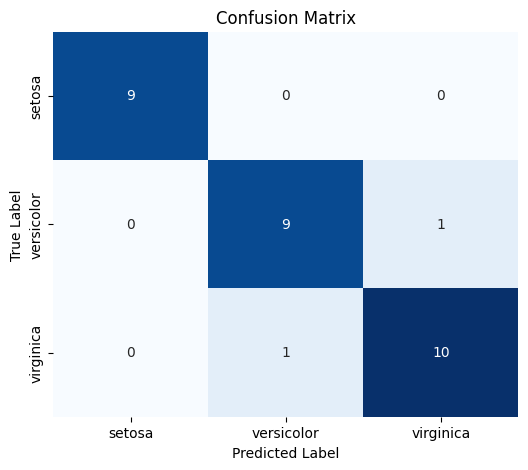

In [302]:
cm = confusion_matrix(y_test, y_hat)
plot_cm(cm, iris.target_names)

Zaimplementowano także pomocniczą funkcję do plotowania metryk dla każdej z klas

In [303]:
def plot_classification_report(report, labels, dataset_name):
    precision = [report[l]["precision"] for l in labels]
    recall = [report[l]["recall"] for l in labels]
    f1_score = [report[l]["f1-score"] for l in labels]

    x = np.arange(len(labels))
    width = 0.3

    plt.figure(figsize=(10, 7))

    plt.bar(x - width, precision, width, label="Precision")
    plt.bar(x, recall, width, label="Recall")
    plt.bar(x + width, f1_score, width, label="F1-Score")

    plt.title(f"Classification Metrics for Each {dataset_name} Class")
    plt.xlabel(f"{dataset_name} Class")
    plt.xticks(ticks=x, labels=labels)
    plt.ylabel("Score")
    plt.ylim(0, 1.1)

    for i in range(len(labels)):
        plt.text(x[i] - width, precision[i] + 0.02, f"{precision[i]:.2f}", ha='center', fontsize=10)
        plt.text(x[i], recall[i] + 0.02, f"{recall[i]:.2f}", ha='center', fontsize=10)
        plt.text(x[i] + width, f1_score[i] + 0.02, f"{f1_score[i]:.2f}", ha='center', fontsize=10)


    plt.legend(loc='lower right')
    plt.show()

In [304]:
def plot_macro_avg(report, dataset_name):
    x_labels = ["Avg Precision", "Avg Recall", "Avg F1-Score"]

    avg_precision = report["macro avg"]["precision"]
    avg_recall = report["macro avg"]["recall"]
    avg_f1_score = report["macro avg"]["f1-score"]

    values = [avg_precision, avg_recall, avg_f1_score]
    colors = ["tab:blue", "tab:orange", "tab:green"]
    labels = ["Precision", "Recall", "F1-Score"]

    plt.figure(figsize=(8, 6))

    bars = plt.bar(x_labels, values, color=colors, label=labels)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
                f"{bar.get_height():.2f}", ha='center', fontsize=12)

    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.title(f"Macro Average Metrics for {dataset_name}")

    plt.legend(loc='lower right')
    plt.show()

Wypisano także metryki na wykresie dla każdej klasy, aby wizualnie porównać różnice między nimi.

accuracy: 0.9333333333333333


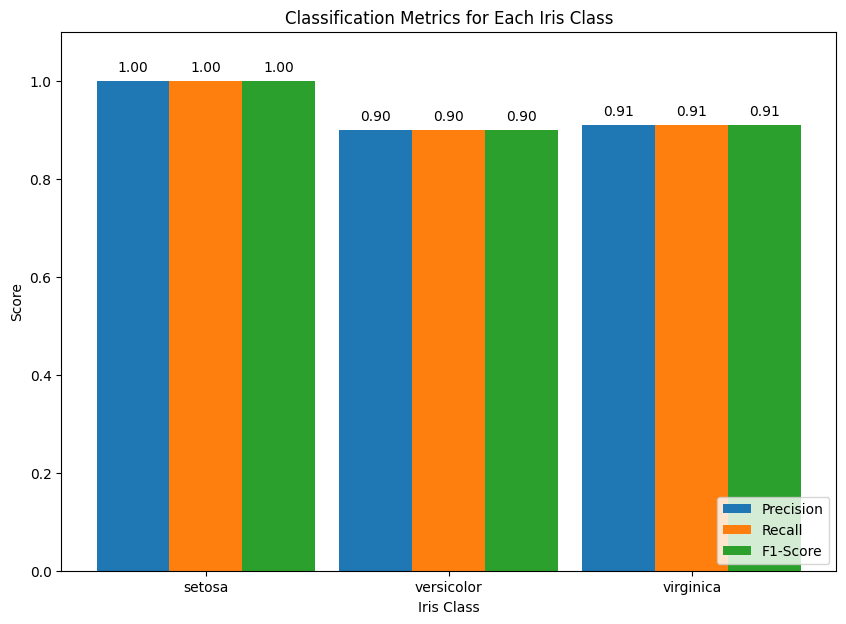

In [305]:
report = classification_report(y_test, y_hat, target_names=iris.target_names, output_dict=True)
print(f'accuracy: {report["accuracy"]}')
plot_classification_report(report, iris.target_names, "Iris")

Wykres ukazuje, iż macro average między metrykami jest równe. Jest to spowodowane tym, iż każda z klas kwiatów ma te same wyniki metryk.

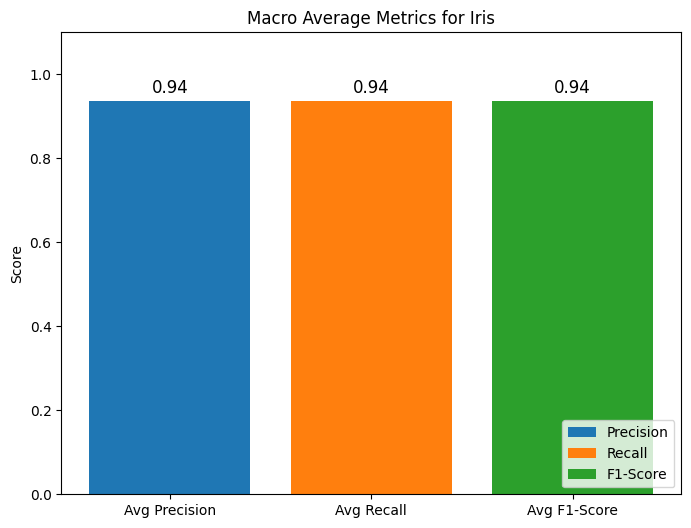

In [306]:
plot_macro_avg(report, "Iris")

#### 4. Implementacja procedury walidacji  krzyżowej (ang. crossvalidation)  dla  różnych  rozmiarów, tj. 2-fold, 5-fold, 10-fold i sprawdzenie jak wpływa na wyniki klasyfikatora k-nn dla zbioru Iris. Jak liczba foldów wpływa na skuteczność? 

Wybrano scoring jako f1_weighted, ponieważ będzie to uniwersalna metoda adekwatna do każdego datasetu. W przypadku Wine oraz PCB występują dysproporcje klas, więc aby adekwatnie sprawdzić F1 scores należy wziąć nieprawidłową dystrybucję wag pod uwagę.

Po modyfikacjach zdecydowano się uwzględnić recall jako metrykę dla PCB, gdyż w przypadku PCB kluczoym jest wykrycie faktycznie bankrutujących firm. (tp/(tp+fn))


In [ ]:
def knn_crossvalidation(X, y, weights, n_neighbors=5, p=2, n_splits=5, score_fn=f1_score):
    kf = KFold(n_splits=n_splits, shuffle=True)
    fold_results = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        imputer = SimpleImputer(strategy="median")
        scaler = StandardScaler()

        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
        knn.fit(X_train, y_train)
        y_hat = knn.predict(X_test)

        score = score_fn(y_test, y_hat, average="weighted", zero_division=0)
        fold_results.append(score)

    return fold_results

Alternatywna funkcja, która stratyfikuje dane podczas KFold

In [ ]:
def knn_crossvalidation_stratified(X, y, weights, n_neighbors=5, p=2, n_splits=5, score_fn=f1_score):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True)
    fold_results = []

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        imputer = SimpleImputer(strategy="median")
        scaler = StandardScaler()

        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
        knn.fit(X_train, y_train)
        y_hat = knn.predict(X_test)

        score = score_fn(y_test, y_hat, average="weighted", zero_division=0)
        fold_results.append(score)

    return fold_results

Funkcja wykonująca test dla 3 podziałów wymienionych w zadaniu

In [14]:
def test_3_folds(X, y, validation_method):
    folds = [2, 5, 10]
    results = []

    for fold in folds:
        results.append(validation_method(X, y, 'uniform', n_splits=fold))

    return results

Funkcja wyliczająca przydatne metryki dla testów

In [15]:
def calculate_metrics(results):
    averages = []

    for result in results:
        averages.append(np.mean(result))

    average = np.mean(averages)
    max_f1 = np.max(averages)
    min_f1 = np.min(averages)
    std_f1 = np.std(averages)

    return average, max_f1, min_f1, std_f1

Funkcja tworząca wykres pudełkowy

In [16]:
def plot_test_3_folds(results, isStratified):
    min_f1 = min([min(res) for res in results])
    labels = ['2-fold', '5-fold', '10-fold']

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=results)
    plt.title(f'Comparison of F1 scores for different K-fold {isStratified}')
    plt.xlabel("Number of Folds")
    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.ylabel("F1-score")
    plt.ylim(min_f1 - 0.1, 1.05)

    plt.show()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

Zautomatyzowanie procesu wykonywania pojedynczego testu

In [18]:
def single_3_folds_test(X, y, validation_method, isStratified):
    results = test_3_folds(X, y, validation_method)
    averages, max_f1, min_f1, std_f1 = calculate_metrics(results)
    print(f'average: {averages}\n max_f1: {max_f1}\n min_f1: {min_f1}\n std_f1: {std_f1}')
    plot_test_3_folds(results, isStratified)

Dokonano pojedynczego pomiaru dla danych niestratyfikowanych

***notatki znajdują się na samym dole tych pomiarów***

average: 0.9494940106106978
 max_f1: 0.9599383377094521
 min_f1: 0.9408701668701669
 std_f1: 0.007890264234367906


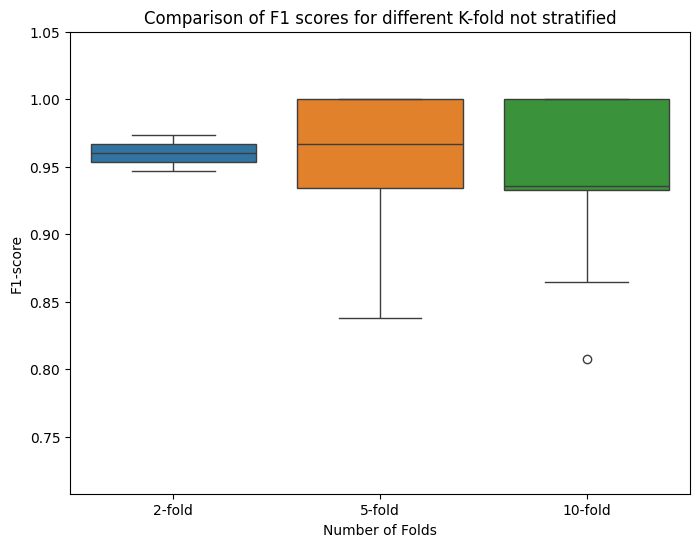

In [19]:
single_3_folds_test(X, y, knn_crossvalidation, "not stratified")

Dokonano pojedynczego pomiaru dla danych stratyfikowanych

average: 0.9396944786857068
 max_f1: 0.9468838763575607
 min_f1: 0.9332264957264957
 std_f1: 0.005598889224132463


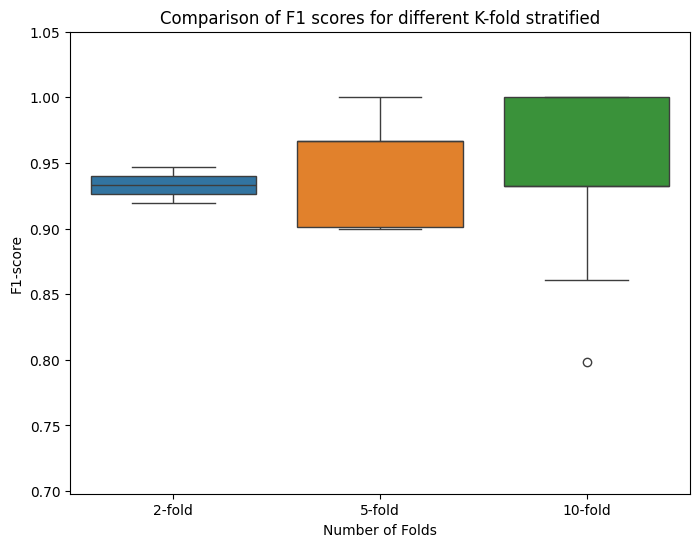

In [20]:
single_3_folds_test(X, y, knn_crossvalidation_stratified, "stratified")

Sprawdzenie statystyk dla 50 iteracji, aby porównać k-foldy

In [21]:
def test_3_folds_metrics(X, y, iterations=50):
    two_fold_results = []
    five_fold_results = []
    ten_fold_results = []

    for _ in range(iterations):
        result = (test_3_folds(X, y, knn_crossvalidation_stratified))
        two_fold_results.append(result[0])
        five_fold_results.append(result[1])
        ten_fold_results.append(result[2])

    avg_two_fold_result = np.mean(two_fold_results)
    avg_five_fold_result = np.mean(five_fold_results)
    avg_ten_fold_result = np.mean(ten_fold_results)

    max_two_fold_result = np.max(two_fold_results)
    max_five_fold_result = np.max(five_fold_results)
    max_ten_fold_result = np.max(ten_fold_results)

    min_two_fold_result = np.min(two_fold_results)
    min_five_fold_result = np.min(five_fold_results)
    min_ten_fold_result = np.min(ten_fold_results)

    std_two_fold_result = np.std(two_fold_results)
    std_five_fold_result = np.std(five_fold_results)
    std_ten_fold_result = np.std(ten_fold_results)

    print(f'2-fold\n avg: {avg_two_fold_result}, max: {max_two_fold_result}, min: {min_two_fold_result}, std: {std_two_fold_result}')
    print(f'5-fold\n avg: {avg_five_fold_result}, max: {max_five_fold_result}, min: {min_five_fold_result}, std: {std_five_fold_result}')
    print(f'10-fold\n avg: {avg_ten_fold_result}, max: {max_ten_fold_result}, min: {min_ten_fold_result}, std: {std_ten_fold_result}')

In [22]:
test_3_folds_metrics(X, y)

2-fold
 avg: 0.9492470343045781, max: 0.9866613311991462, min: 0.8905309250136836, std: 0.02078113530362393
5-fold
 avg: 0.9511956343751471, max: 1.0, min: 0.8, std: 0.03709871394031444
10-fold
 avg: 0.9486201576201577, max: 1.0, min: 0.7248677248677249, std: 0.04984151070254847


Dokonano testu dla 50 iteracji, aby uśrednić podejścia oraz uzyskać stabilne rozwiązanie i porównać stratyfikację.

In [23]:
def compare_stratify_k_folds(X, y, iterations=50):
    metrics_normal = []
    metrics_stratified = []

    for i in range(iterations):
        metrics_normal.append(calculate_metrics(test_3_folds(X, y, knn_crossvalidation)))
        metrics_stratified.append(calculate_metrics(test_3_folds(X, y, knn_crossvalidation_stratified)))

    average_normal = np.mean([m[0] for m in metrics_normal])
    max_normal = np.max([m[1] for m in metrics_normal])
    min_normal = np.min([m[2] for m in metrics_normal])
    std_normal = np.std([m[3] for m in metrics_normal])

    average_stratified = np.mean([m[0] for m in metrics_stratified])
    max_stratified = np.max([m[1] for m in metrics_stratified])
    min_stratified = np.min([m[2] for m in metrics_stratified])
    std_stratified = np.std([m[3] for m in metrics_stratified])

    print(f'normal average: {average_normal}\n normal max_f1: {max_normal}\n normal min_f1: {min_normal}\n normal std_f1: {std_normal}')
    print()
    print(f'stratified average: {average_stratified}\n stratified max_f1: {max_stratified}\n stratified min_f1: {min_stratified}\n stratified std_f1: {std_stratified}')

    print("\n\n")
    print("differences between normal and stratified")
    print(f'average: {average_normal - average_stratified}')
    print(f'max_f1: {max_normal - max_stratified}')
    print(f'min_f1: {min_normal - min_stratified}')
    print(f'std_f1: {std_normal - std_stratified}')

In [24]:
compare_stratify_k_folds(X, y)

normal average: 0.9493409438808706
 normal max_f1: 0.9798025747672806
 normal min_f1: 0.9063970025424863
 normal std_f1: 0.004491645491743401

stratified average: 0.9493763931305081
 stratified max_f1: 0.9733226623982927
 stratified min_f1: 0.9128619528619528
 stratified std_f1: 0.004882657186346254



differences between normal and stratified
average: -3.544924963749807e-05
max_f1: 0.006479912368987928
min_f1: -0.006464950319466478
std_f1: -0.0003910116946028528


#### **Jak liczba foldów wpływa na skuteczność?**
Liczba foldów znacząco wpłwa na skuteczność. 

Przy 2 foldach mamy 2 zbiory - przez co pół zbioru stanowi test a drugie pół train. Przez to nasz model ma małe możliwości uczenia się, ponieważ posiada tylko połowę danych jako dane testowe. Tym samym 2 fold prowadzi do bardzo niestabilnych wyników

Przy 5 foldach posiadamy 20% zbioru jako test, a 80% zbioru jako train. Jest to typowy podział dla niedużych zbiorów danych, dzięki czemu możemy adekwatnie przeanalizować f1 scory dla kolejnych testów

Przy 10 foldach posiadamy zaledwie 10% zbioru jako test. Daje to ogromną liczbę danych treningowych przez co test może być mało reprezentatywną częścią, szczególnie przy braku stratyfikacji. 10 fold jest najbardziej stabilny pod względem wyników.

Dodatkowo im większa liczba foldów tym zwiększa się czas uczenia - musimy wykonać aż 10 podziałów i 10 iteracji testów przy 10-fold.

Z eksperymentu dla 50 interacji wynika, iż najwyższy średni F1 score osiąga 10 fold, następnie 5 fold, a na końcu 2 fold. Dodatkowo im więcej foldów tym rośnie odchylenie standardowe wyników

#### ***Dlaczego powinno się używać procedury mieszania danych (tj. shuffle)?***
Bez zastosowania shuffle może dojść do bardzo nierealistycznych eksperymentów. Przykłądowo, jeśli nasze dane są posortowane klasami, tzn mamy wpierw 50 setos, później 50 versicolor, a na końcu reszte, to 3 fold powodowałby, że mamy w teście jedynie przypadki klas, których nie znajdziemy w treningu. 

#### ***Jaką trudność stanowi użycie walidacji krzyżowej typu leave-one-out?*** 

Leave-one-out jest równoznaczne z użyciem Kfold(n-1), czyli że używamy jeden sample jako test, a pozostałe jako trening.
Jest to bardzo złożona obliczeniowo operacja, ponieważ dla 1000000 danych mamy 1000000 testów. Dodatkowo wyniki mogą być bardzo niestabilne, ponieważ mamy testowanie na zaledwie 1 próbce.


#### ***Czy można liczbę foldów dobierać jak hiperparametr metody?***

Zdecydowanie można. Liczba foldów może być traktowana jako hiperparametr, który określa jak dużo testów chcemy zrobić, jak szybkiej walidacji potrzebujemy, wybierać go na podstawie tego ile klas mamy, jak bardzo stabilne wyniki są nam potrzebne.

#### **Czy stratyfikacja miała tu wpłw**
Stratyfikacja miała zerowy wpływ dla tego eksperymentu jak ukazano w różnicach między podejściem bez oraz ze stratyfikacją. Moze być to spowodowane równomiernym podziałem klas lub faktem, iż w iris każda klasa jest mocno odseparowana, więć klasyfikacja jest bardzo łatwa.


#### 5. Sprawdzenie różnych wartości parametrów klasyfikatora k-nn dla zbioru IRIS

Ze względu na złożoność eksperymentu na podstawie gridsearch, zdecydowano się testować parametry pojedynczo, parametryzując jeden, a reszte pozostawiając za stałą, alternatywnie parametryzując k dla weights i metric.

Dla testu 3 foldów, 8 wartości k, 3 metryk oraz 3 głosowań osiągniętoby 216 "pudełek" dla boxplota. Odseparowanie ich per K-fold, bądź per metryka jedynie utrudniłoby porównywanie właśnie tego atrybutu  między sobą, mimo mniejszej liczby pudełek na wykresie. 

W funkcji odległości zdecydowano się w pierwszej kolejności przetransformować odległość na wagę za pomocą funkcji wykłądniczej, a następnie obcięto outliery będące poza 80% perecntylem

In [ ]:
def custom_weights(distances):
    distance_threshold = np.percentile(distances, 80) # robimy 'ala IQR' - ucinamy outliery na podstawie 80% percentyla
    weights = np.exp(-distances) # im bliżej tym większa waga
    
    weights[distances > distance_threshold] = 0
    return weights

#### 5.1 Sprawdzenie różnych wartości k dla 5-fold, metryki euklidesowej oraz głosowania większości

In [26]:
def get_k_values_results(X, y, validation_method):
    results = []
    k_values = np.arange(1, 16)

    for k in k_values:
        results.append(validation_method(X, y, 'uniform', n_neighbors=k, p=2, n_splits=5))

    return results, k_values

In [27]:
def plot_k_values(X, y, validation_method):
    results, k_values = get_k_values_results(X, y, validation_method)

    min_f1 = min([min(res) for res in results])
    max_f1 = max([max(res) for res in results])

    plt.figure(figsize=(15, 8))
    sns.boxplot(data=results)
    plt.title(f'Comparison of F1 scores for different number of neighbors')
    plt.xlabel("Number of neighbors")
    plt.xticks(ticks=range(len(k_values)), labels=k_values)
    plt.ylabel("F1-score")
    plt.ylim(min_f1 - 0.01, max_f1 + 0.01)

    plt.show()

Wykres różnicy F1 score dla różnych wartości parametru k ukazuje, iż dla datasetu iris wybór ten nie ma więszkego znacznia. Eksperyment nie jest wysoce stabilny, a klasy są mocno odseparowane, przez co w większości przypadków osiągniemy sukces. Nie zaobserwowano na pojedynczej obserwacji charakterystycznych różnic między k parzystym a nie parzystym

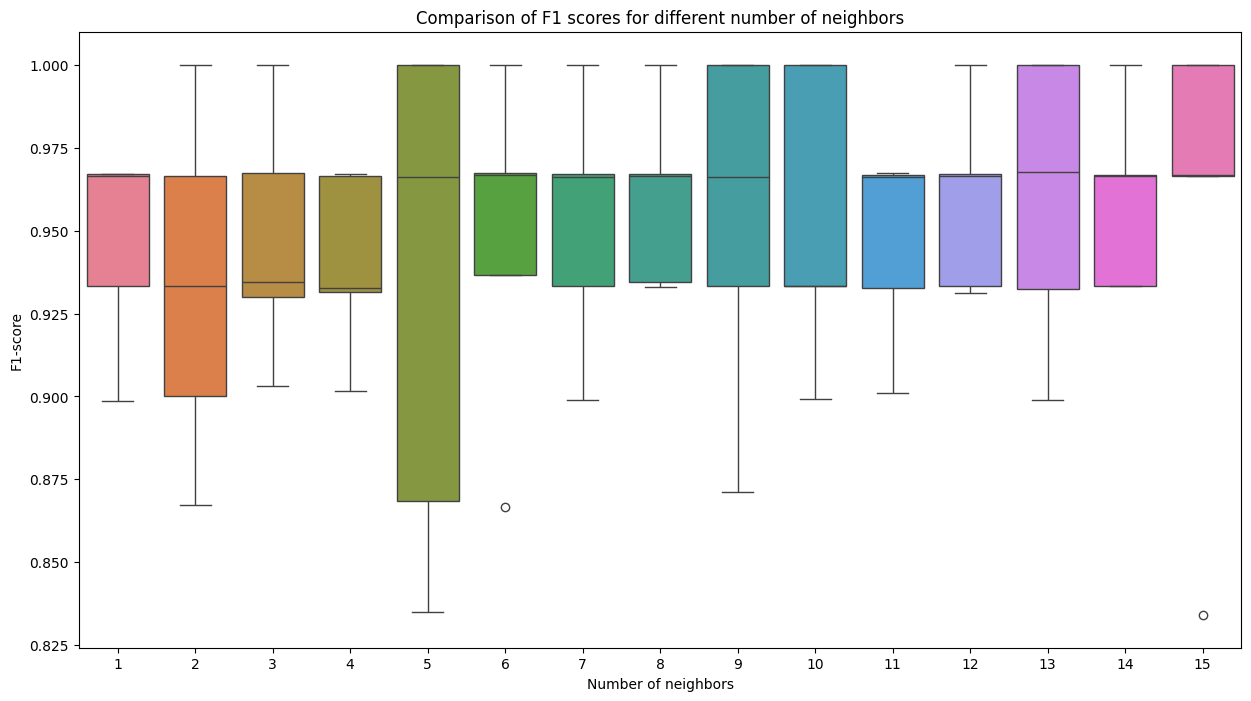

In [313]:
plot_k_values(X, y, knn_crossvalidation)

Dane stratyfikowane ukazują te same wnioski. Stratyfikacja nie wniosła nic do analizy.

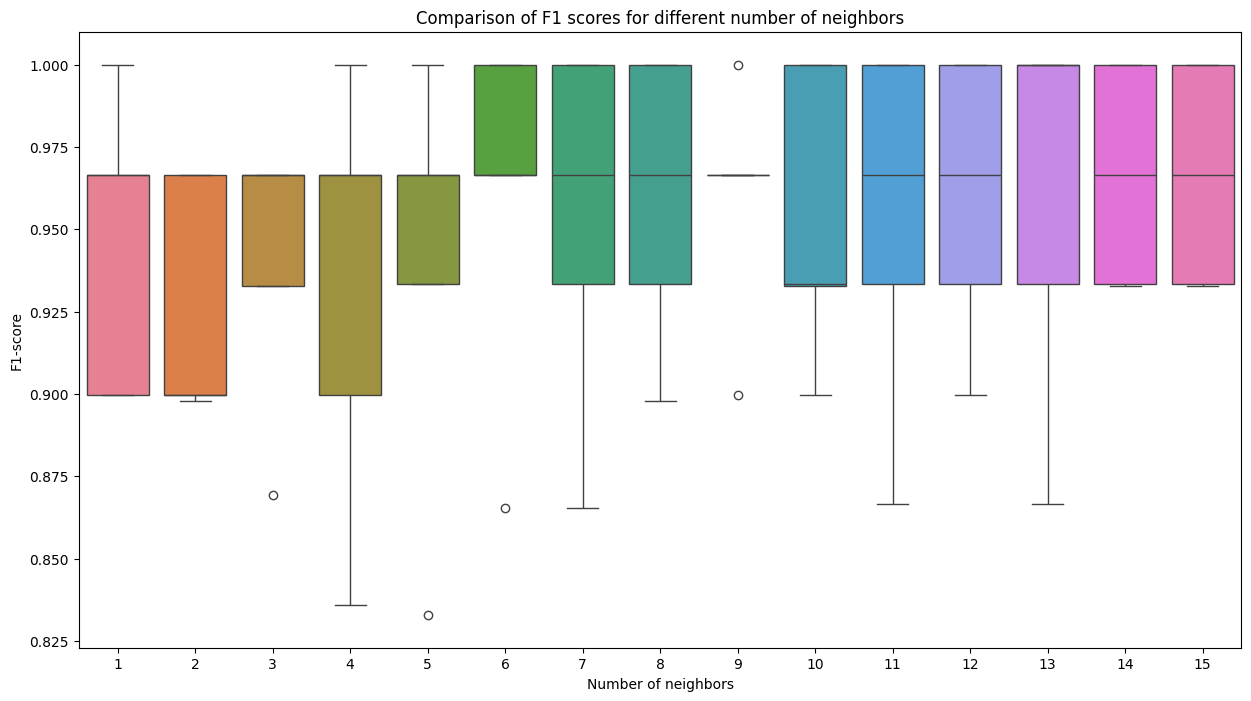

In [314]:
plot_k_values(X, y, knn_crossvalidation_stratified)

In [30]:
def test_values(X, y, get_values_method, iterations=50):
    results = []

    for _ in range(iterations):
        results.append(get_values_method(X, y, knn_crossvalidation_stratified)[0])
    
    labels = get_values_method(X, y, knn_crossvalidation_stratified)[1]

    results = np.array(results)
    means = np.mean(np.mean(results, axis=0), axis=1)
    maxs = np.max(np.max(results, axis=0), axis=1)
    mins = np.min(np.min(results, axis=0), axis=1)
    stds = np.std(np.std(results, axis=0), axis=1)

    x = np.arange(1, 16)
    width = 0.2

    plt.figure(figsize=(20, 8))

    plt.bar(x - 1.5*width, means, width, label="mean")
    plt.bar(x - 0.5*width, maxs, width, label="max")
    plt.bar(x + 0.5*width, mins, width, label="min")
    plt.bar(x + 1.5*width, stds, width, label="std")

    plt.title(f"F1 score avg, max, min, std for different hyperparameters")
    plt.xlabel(f"K value")
    plt.xticks(ticks=x, labels=labels, rotation=45)
    plt.ylabel("Score")
    plt.ylim(0, 1.1)

    for i in range(0, 15):
        plt.text(x[i] - 1.5*width, means[i] + 0.02, f"{means[i]:.4f}", ha='center', fontsize=10, rotation=90)
        plt.text(x[i] - 0.5*width, maxs[i] + 0.02, f"{maxs[i]:.4f}", ha='center', fontsize=10, rotation=90)
        plt.text(x[i] + 0.5*width, mins[i] + 0.02, f"{mins[i]:.4f}", ha='center', fontsize=10, rotation=90)
        plt.text(x[i] + 1.5*width, stds[i] + 0.02, f"{stds[i]:.4f}", ha='center', fontsize=10, rotation=90)


    plt.legend(loc='upper right')
    plt.show()

Test dla 50 iteracji ukazał, iż wartości parzyste osiągają minimalnie mniejsze wyniki w średniej F1 score do momentu k=8. Po tej wartości różnice są mniejsze i nie posiadają tej tendencji.

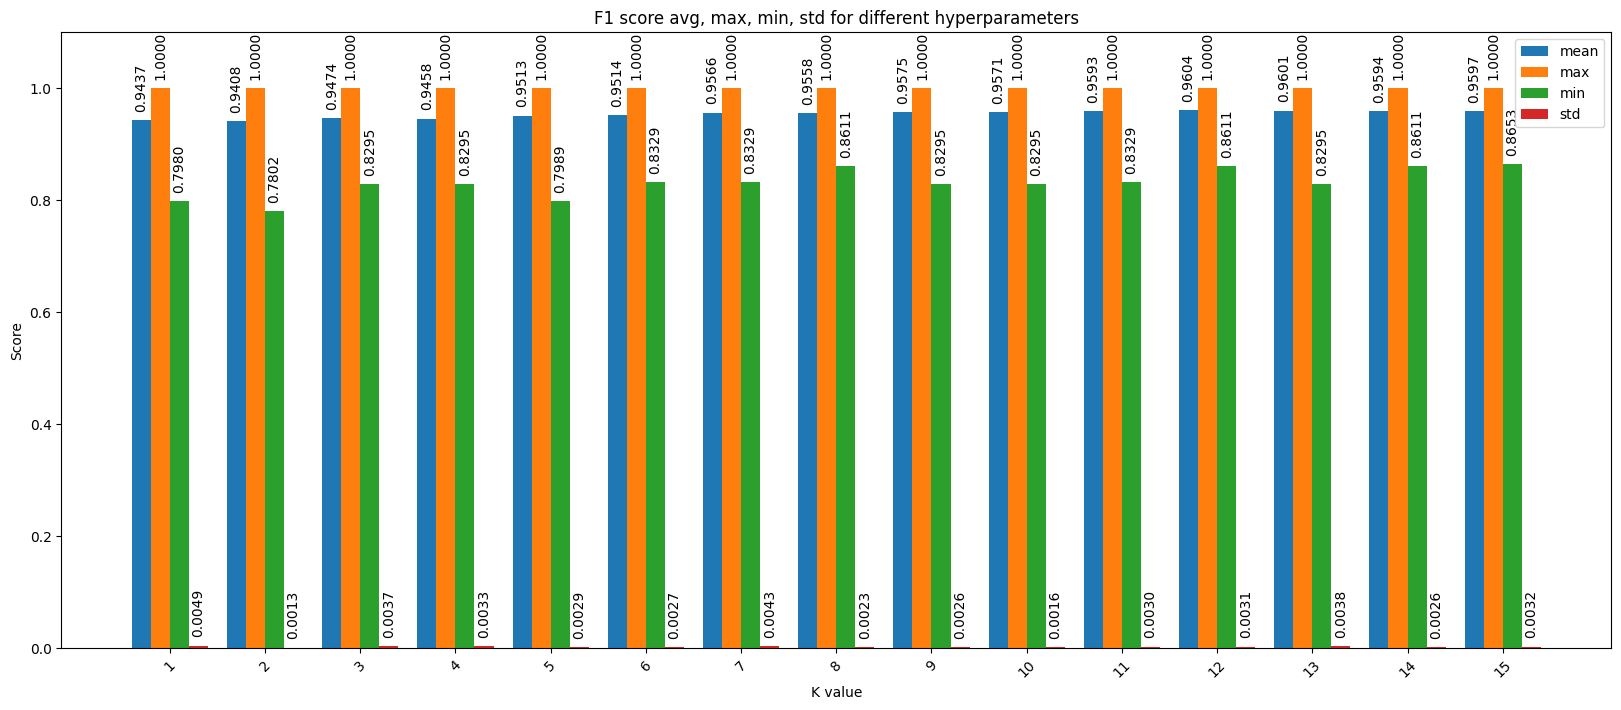

In [316]:
test_values(X, y, get_k_values_results)

#### 5.2 sprawdzenie różnych metryk dla 5-fold, k równego 3 oraz głosowania większości

In [32]:
def get_metric_results(X, y, validation_method):
    results = []
    p_values = np.array([1, 2, np.inf])
    p_labels = ['manhatan', 'euclidian', 'chebyshev']
    k_values = np.array([3, 5, 7, 10, 15])
    k_labels = ["k=3", "k=5", "k=7", "k=10", "k=15"]
    labels = []

    for i, p in enumerate(p_values):
        for j, k in enumerate(k_values):
            results.append(validation_method(X, y, 'uniform', n_neighbors=k, p=p, n_splits=5))
            labels.append(f'{p_labels[i]}, {k_labels[j]}')

    return results, labels

In [33]:
def plot_metric_values(X, y, validation_method):
    results, labels = get_metric_results(X, y, validation_method)

    min_f1 = min([min(res) for res in results])
    max_f1 = max([max(res) for res in results])

    plt.figure(figsize=(15, 8))
    sns.boxplot(data=results)
    plt.title(f'Comparison of F1 scores for different Metric')
    plt.xlabel("Metric")
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
    plt.ylabel("F1-score")
    plt.ylim(min_f1 - 0.01, max_f1 + 0.01)


    plt.show()

Wykres ukazujący porównanie różnych sposobów liczenia odległości ukazuje, iż parametr ten także nie ma większego wpływu w zbiorze Iris porównując odległość manhatan i euklides. Algorytm radzi sobie bardzo dobrze dla obydwu metryk. Dla odległosi chebyshev algorytm działa zdecydowanie gorzej mimo małej stabilności wyników.

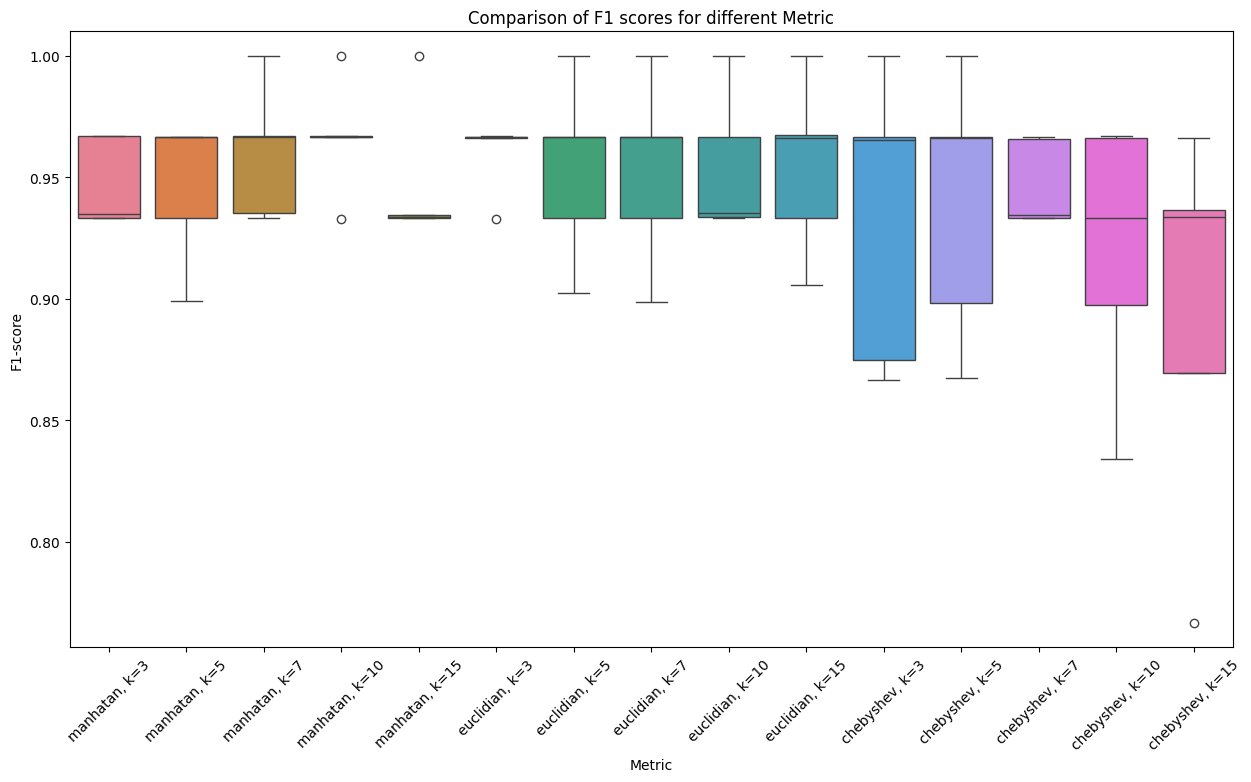

In [317]:
plot_metric_values(X, y, knn_crossvalidation)

Stratyfikacja ponownie nie wprowadziła zmian w wykresie, lecz koeljny raz można zaobserwować gorsze wyniki dla miary chebysheva.

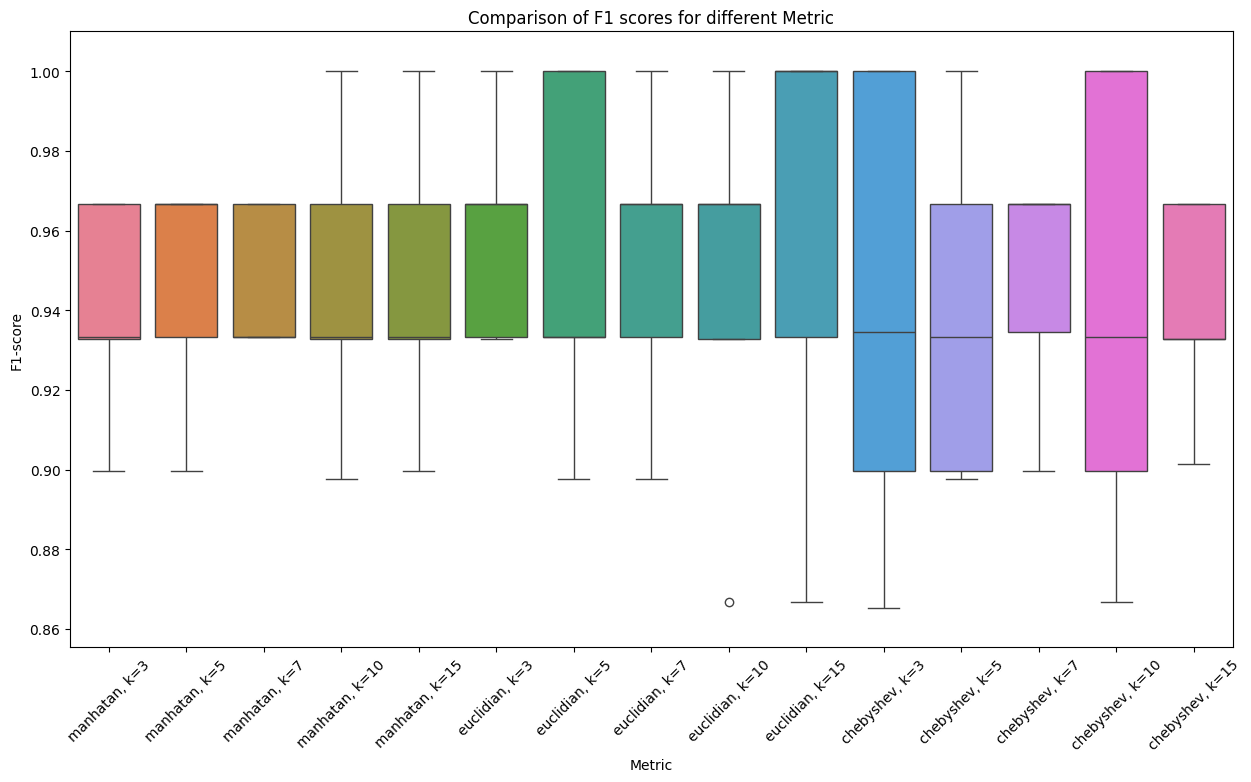

In [318]:
plot_metric_values(X, y, knn_crossvalidation_stratified)

Test dla 50 iteracji ukazał, iż miary euklidesowe posiadają statystycznie więszką średnią oraz minimum niż miara manhatan. Z kolei miara chebyshev posiada zdecydowanie niższe imary minimalne niż dla pozostałych miar. Dodatkowo średnia wartość miary f1 jest zdecydowanie niższa dla metryki chebyshebv. Jako ostatnią obserwację odnotowano, iż miara chebyshev posiada wyższe odchylenie standardowe powodując, iż eksperymenty mogą być mniej stabilne. 

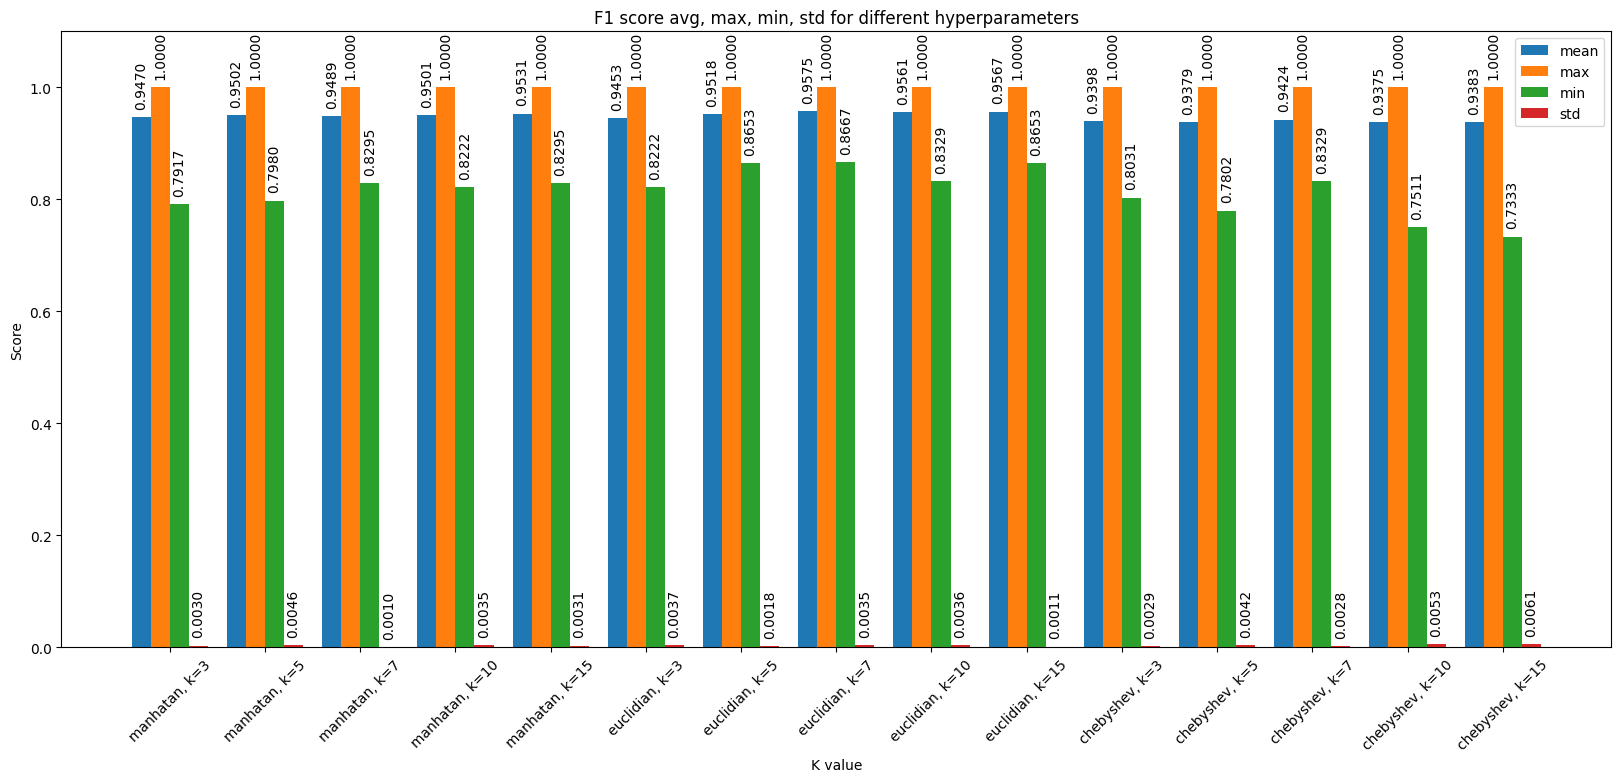

In [36]:
test_values(X, y, get_metric_results)

#### 5.3 Sprawdzenie różnych głosowań dla 5-fold, k równego 3 oraz metryki euklidesowej

In [37]:
def get_weight_result(X, y, validation_method):
    results = []
    w_values = ['uniform', 'distance', custom_weights]
    w_names = ['uniform', 'distance', 'custom']
    k_values = np.array([3, 5, 7, 10, 15])
    k_labels = ["k=3", "k=5", "k=7" ,"k=10", "k=15"]
    labels = []

    for i, w in enumerate(w_values):
        for j, k in enumerate(k_values):
            results.append(validation_method(X, y, w, n_neighbors=k, p=2, n_splits=5))
            labels.append(f'{w_names[i]}, {k_labels[j]}')
    
    return results, labels

In [38]:
def plot_weight_values(X, y, validation_method):
    results, labels = get_weight_result(X, y, validation_method)

    min_f1 = min([min(res) for res in results])
    max_f1 = max([max(res) for res in results])

    plt.figure(figsize=(15, 8))
    sns.boxplot(data=results)
    plt.title(f'Comparison of F1 scores for different weights')
    plt.xlabel("Weights")
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
    plt.ylabel("F1-score")
    plt.ylim(min_f1 - 0.01, max_f1 + 0.01)

    plt.show()

Wykres ukazuje porównanie różnych metod głosowania. Dla pojedynczego eksperymentu można zaobserwować, iż głosowanie więszkościowe radzi sobie najlepiej z problemem, będąc najbardziej stabilnym dla wszystkich K. Głosowanie na podstawie dystansu z miarą euklidesową ukazuje mniejszą stabilność dla różnych k, lecz podobny wynik F1 pomijaąc k=3. Własna implementacja funkcji głosowania poradziła sobie najgorzej w porównaniu z poprzednikami.

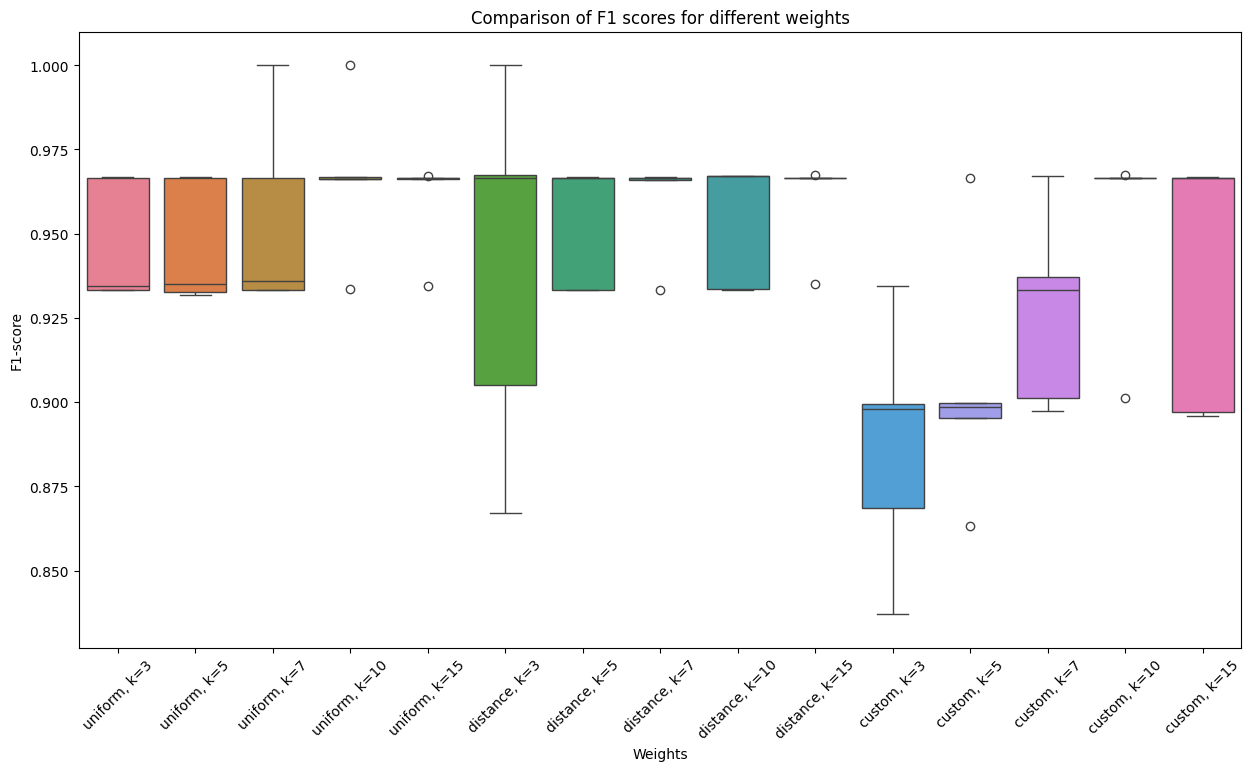

In [39]:
plot_weight_values(X, y, knn_crossvalidation)

Stratyfikacja danych ponownie nie ma wpływu na wyniki.

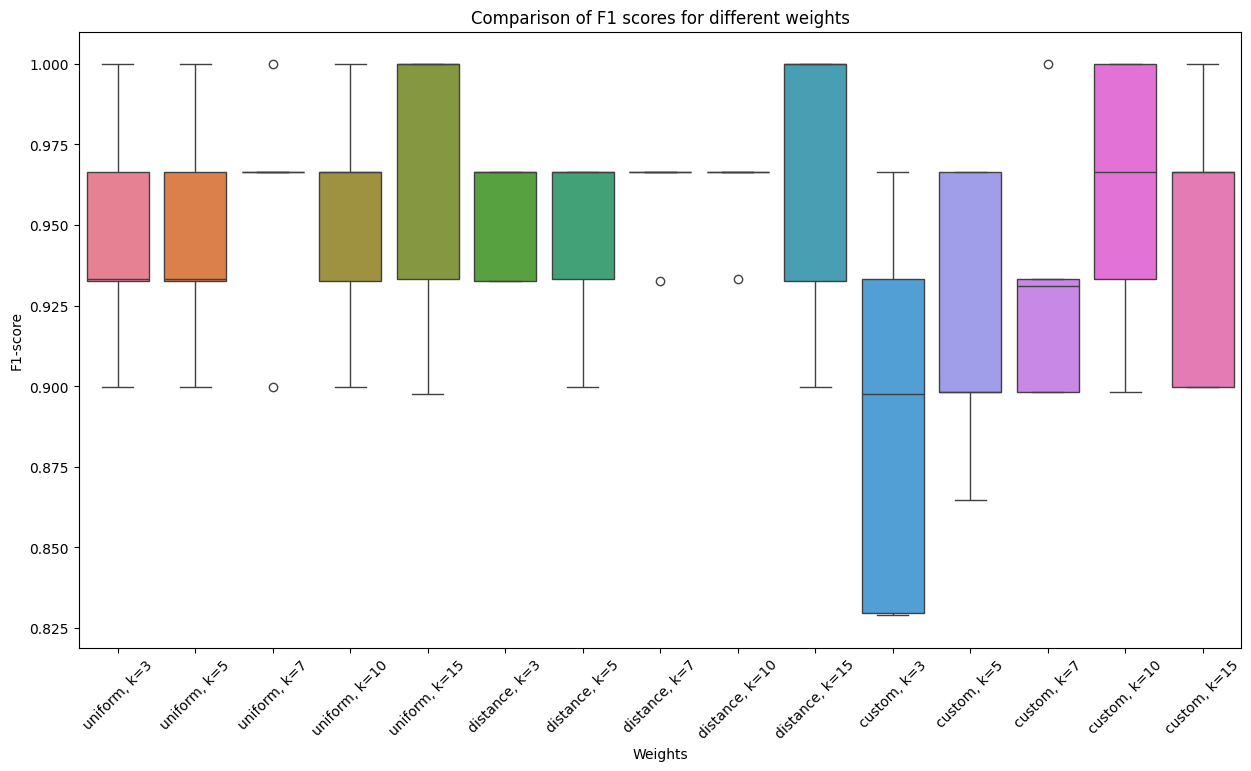

In [40]:
plot_weight_values(X, y, knn_crossvalidation_stratified)

Test dla 50 iteracji ukazał, iż własna implementacja sposobu głosowania radzi sobie zdecydowanie gorzej od wbudowanych alternatyw. Jej średnia jest statystycznie mniejsza o aż 3 punkty procentowe dla niskich wartości k, lecz dla wyższych (k=15) staje się podobna. Dodatkowo własna implementacja przy niskich wartościach k daje bardzo niskie wartości minimalne. Dla wbudowanych sposobów głosowania można zaobserować podobne wyniki dla wyższych wartości k z minimalnie lepszym wynikiem F1 dla głosowania odległością. Dla niskich wartości k zdecydowanie lepszą opcją jest głosowanie odległościowe.

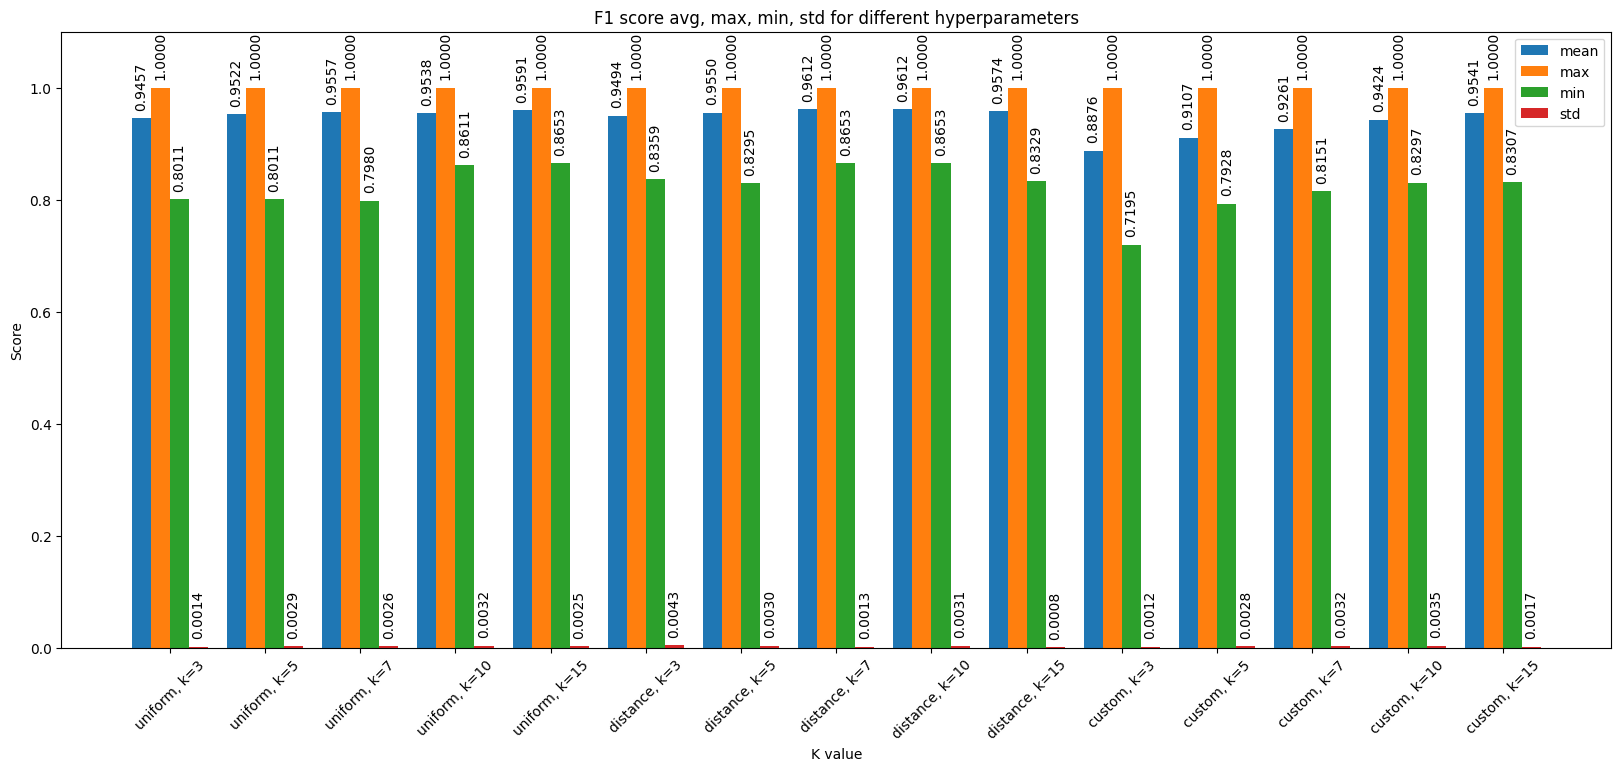

In [41]:
test_values(X, y, get_weight_result)

### 2. WINE

In [330]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

#### 1. Uruchomienie algorytmu klasyfikacji k-nn dla zbioru WINE – używamy  wartości parametrów domyślnych (np. k=5, odległość Euklidesa, głosowanie większościowe)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

#### 3. Analiza macierzy pomyłek oraz metryk dla eksperymentu

Class_0

1. 7 próbek zostało poprawnie sklasyfikowanych jako class_0.
2. 1 próbka została błędnie zaklasyfikowana jako class_2.
3. 0 pomyłek z class_1.

Class_1

1. 11 próbek poprawnie sklasyfikowanych jako class_1.
2. 2 próbki błędnie sklasyfikowane jako class_2.
3. 0 pomyłek z class_0.

Class_2

1. 7 próbek poprawnie sklasyfikowanych jako class_2.
2. 7 błędnie sklasyfikowanych jako class_1.
3. 1 błędnie zaklasyfikowana jako class_0.

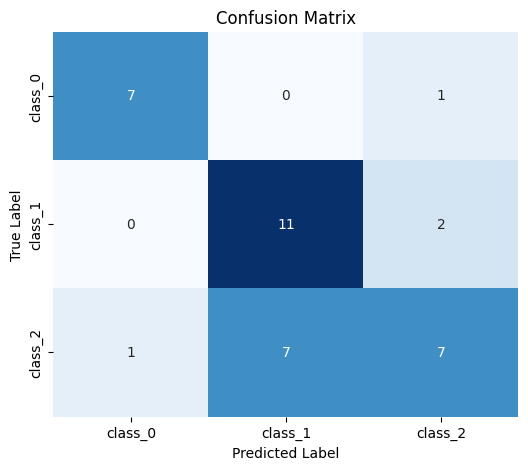

In [44]:
cm = confusion_matrix(y_test, y_hat)
plot_cm(cm, wine.target_names)

Wartość accuracy jest dość niska porównując możliwośći podstawowego knn dla zbioru Iris dataset. Jest to spowodowane gorszą reprezentacją poszczególnych klas oraz trudnościami z separowaniem ich.

Na wykresie ukazano, iż klasa 0 została najlepiej sklafysikowana z najwięszą ilością prawidłowości.

Klasa 1 posiada wysoki recall oraz niski precision. Oznacza to, iż posiada większą liczbę False Negative niż False Positve. (skasyfikowano class_1 dwa razy jako class_2 oraz sklasyfikowano aż 7 razy jako class_1, gdy było to class_2)

Klasa 2 posiada z kolei wysoki precision, wynika to z powyższej analizy. 7 razy sklasyfikowano nieprawidłowo class_1 jako class_2.

accuracy: 0.6944444444444444


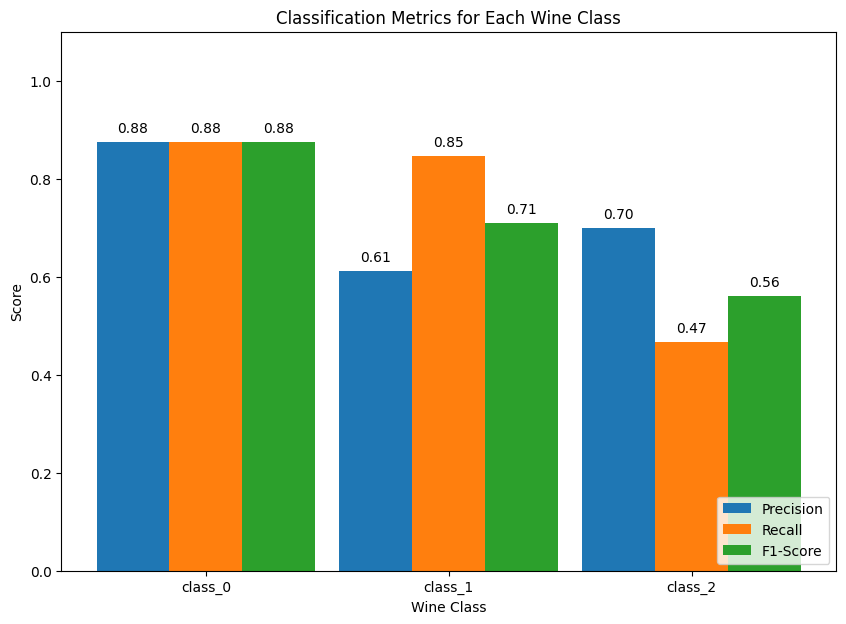

In [45]:
report = classification_report(y_test, y_hat, target_names=wine.target_names, output_dict=True)
print(f'accuracy: {report["accuracy"]}')
plot_classification_report(report, wine.target_names, "Wine")

Średnie wartości F1, recall oraz precision pośród datasetu ukazują, iż domyślne wartości dla KNN nie radzą sobie najlepiej z wine dataset.

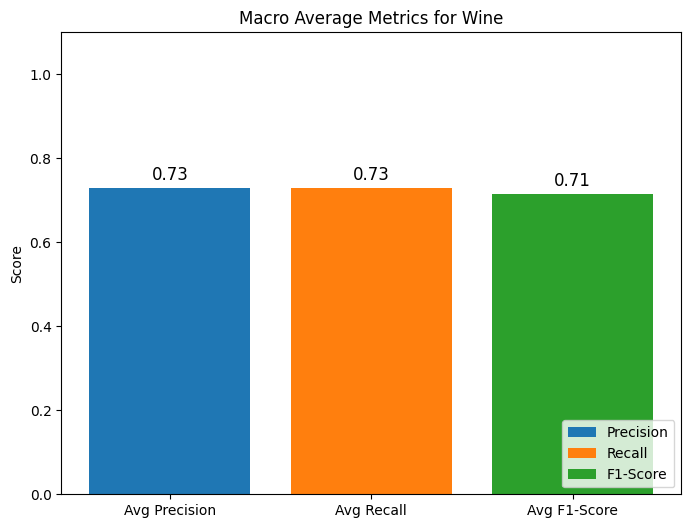

In [46]:
plot_macro_avg(report, "Wine")

#### 4. Implementacja procedury walidacji  krzyżowej (ang. crossvalidation)  dla  różnych  rozmiarów, tj. 2-fold, 5-fold, 10-fold i sprawdzenie jak wpływa na wyniki klasyfikatora k-nn dla zbioru WINE. Jak liczba foldów wpływa na skuteczność? 

Dla pojedynczego niestratyfikowanego eksperymentu można zaobserowować, iż większy podział danych - 10 fold. Zagwarantował znacznie lepszy F1 score, często sięgający wartości wyższych niż 95% (mediana na wysokości 97%).

2-fold ze względu na zaledwie 2 próbki ukazał gorsze  wyniki, raz około 96%, a drugi około 93%. Dodatkowo po powonownym uruchomieniu eksperymentu stabilność tych wyników jest bardzo niska.

5-fold okazał się być dosłownie między 2, a 10 fold. Jest mniej niestabilny niż 2 fold, jednocześnie osiąga lepsze wyniki od niego, lecz jest bardziej niestabilmny od 10-fold osiągając statystycznie wyniki gorsze.

average: 0.9565741221632352
 max_f1: 0.971132308158958
 min_f1: 0.9431274909781341
 std_f1: 0.011459904359857028


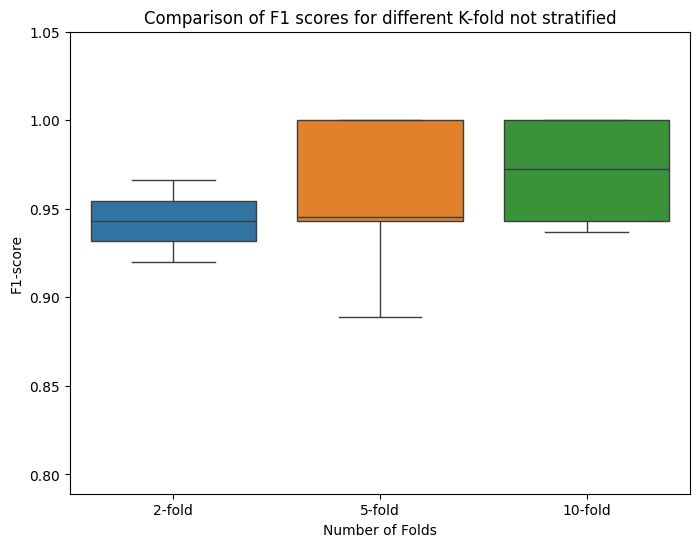

In [47]:
single_3_folds_test(X, y, knn_crossvalidation, "not stratified")

Stratyfikacja ukazała zdecydowane różnice dla zbioru Wine. Tym razem F1 score są zdecydowanie wyższe dla wszystkich foldów. Spowodowane jest to równomierną reprezentacją etykiet między zbiorami. Jedna z klas (na podstawie analizy z zeszłego laboratorium) jest bardzo nisko reprezentowana, przez to bez stratyfikacji mogła w 100% wpaść do jednego zbioru dla 2 fold, a w drugim kompletnie nie występować, powodując same błędnę przypisania dla tej klasy.

average: 0.9757719672876922
 max_f1: 0.9832356199139823
 min_f1: 0.9719903348591472
 std_f1: 0.005277756060017474


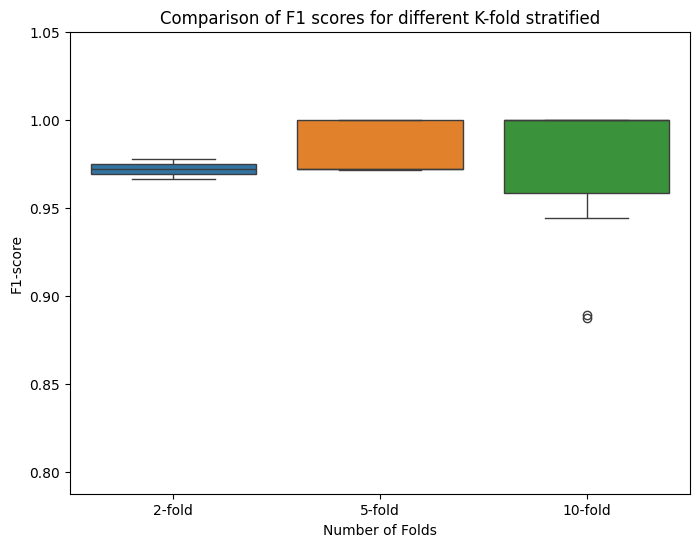

In [48]:
single_3_folds_test(X, y, knn_crossvalidation_stratified, "stratified")

Dla 2-fold model osiągan najniższą skuteczność, lecz rozrzut jest najbardzije stabilny. Dodatkowo KNN ani razu nie osiągnęło wartości 100% dla 2-fold. Może być to spowodowane brakiem stratyfikacji i nieprawidłowym klasyfikowaniem klasy o najniższej liczbie reprezentatnów.

Dla 5-fold model osiąga środkową skuteczność oraz środkową stabilność. 

10-fold osiąga najwyższe wyniki, lecz zdecydowanie najniższą sstabilność. Występują tu także najniższe wartości minimalne.

In [49]:
test_3_folds_metrics(X, y)

2-fold
 avg: 0.9558100497810197, max: 0.9887995711023767, min: 0.8965973965910005, std: 0.017125200778957062
5-fold
 avg: 0.9644851140196817, max: 1.0, min: 0.8835164835164835, std: 0.027744066526897822
10-fold
 avg: 0.9658426661210974, max: 1.0, min: 0.8111365758424581, std: 0.04111977902172566


Mimo poprzednich analiz z 50-iteracyjnego testu wynika, iż stratyfikacja zalewdnie minimalnie poprawia średni F1-score, ale nie wpływa znacząco na rozkład wyników. Różnice są niewielkie, co sugeruje, że w tym przypadku stratyfikacja nie miała dużego wpływu na model.

In [50]:
compare_stratify_k_folds(X, y)

normal average: 0.9598526929571165
 normal max_f1: 0.9832759348179525
 normal min_f1: 0.9330774419684739
 normal std_f1: 0.003650095753904272

stratified average: 0.9616892342698182
 stratified max_f1: 0.977711768454397
 stratified min_f1: 0.9314749089607599
 stratified std_f1: 0.004282089995118693



differences between normal and stratified
average: -0.0018365413127017227
max_f1: 0.0055641663635555005
min_f1: 0.0016025330077139577
std_f1: -0.0006319942412144216


#### 5. Sprawdzenie różnych wartości parametrów klasyfikatora k-nn dla zbioru WINE

#### 5.1 Sprawdzenie różnych wartości k dla 5-fold, metryki euklidesowej oraz głosowania większości

Dla pojedynczego testu różnic wartości k wykres ukazuje, iż niskie wartości "k" osiągają najmniejszą stabilnośc wyników. "k" na poziomie 6 daje wyniki stabilniejsze, lecz k więsze od 12 najczęściej ukazuje 100% dla F1 score.

Na podstawie pojedynczego eksperymentu nie widać znaczących różnic między parzystością a jej brakiem dla parametru k.

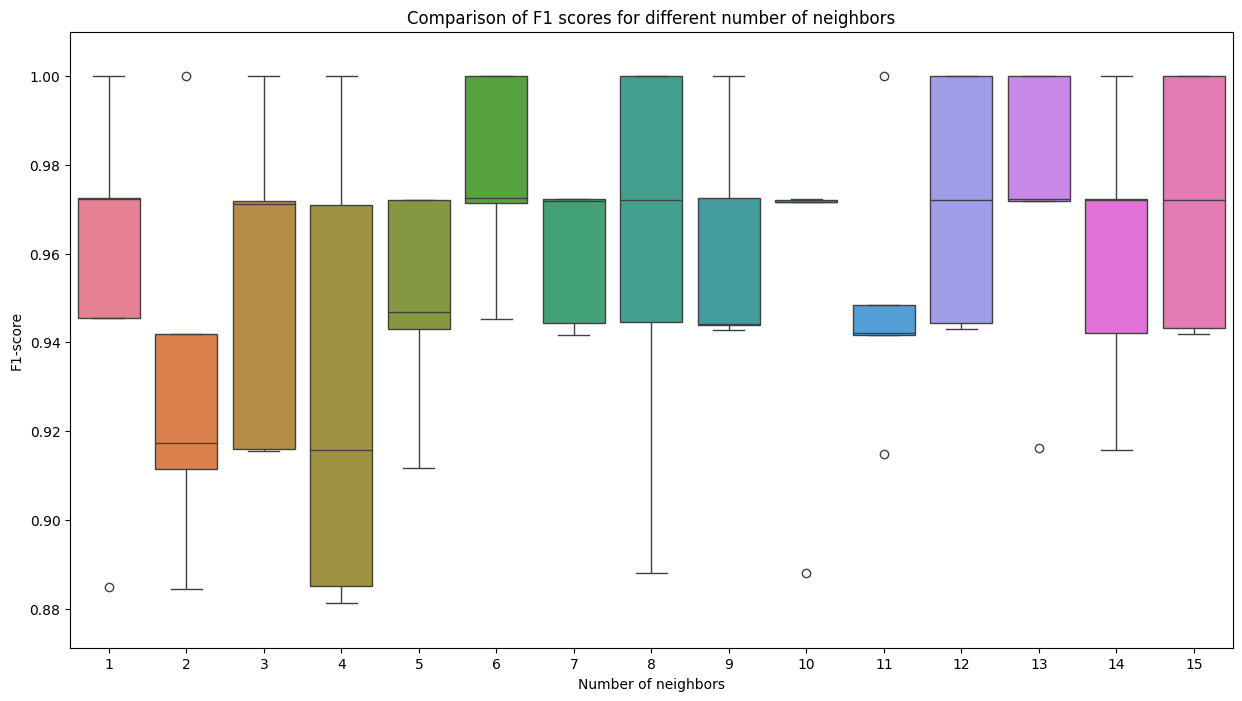

In [323]:
plot_k_values(X, y, knn_crossvalidation)

Dodanie stratyfikacji spowodowało ustabilnienie wyników dla pojedynczej obserwacji.

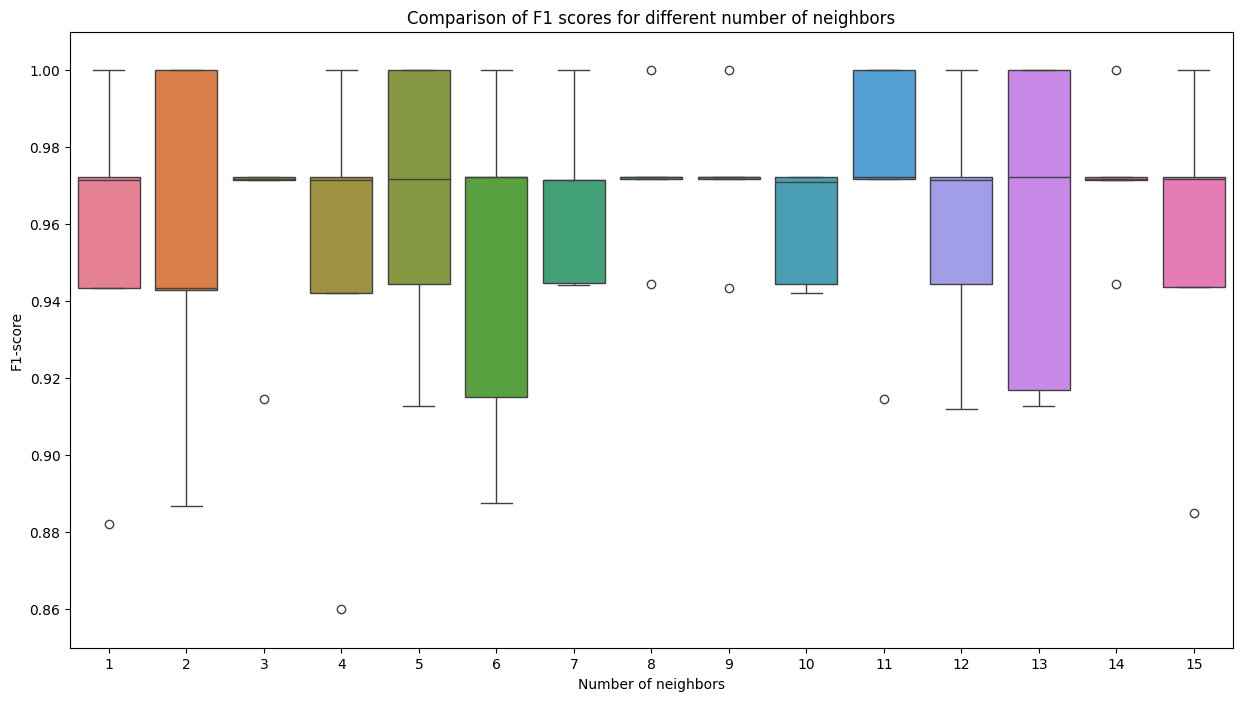

In [325]:
plot_k_values(X, y, knn_crossvalidation_stratified)

Wykres dla 50 iteracji ukazuje, iż średnie f1-score są niższe dla wartości parzystych. **Porównując daną wartośc średniej parzysta z jej nieparzystymi sąsiadami, zawsze jest ona od nich niższa.**

dla niższych k częściej odnotowuja się niższe wyniki wartości minimalnych.

Dodatkowo można zaobserwować, iż najwyższe wartości średnich F1-score odnotowano dla wyższych, nieparzystych wartości k.

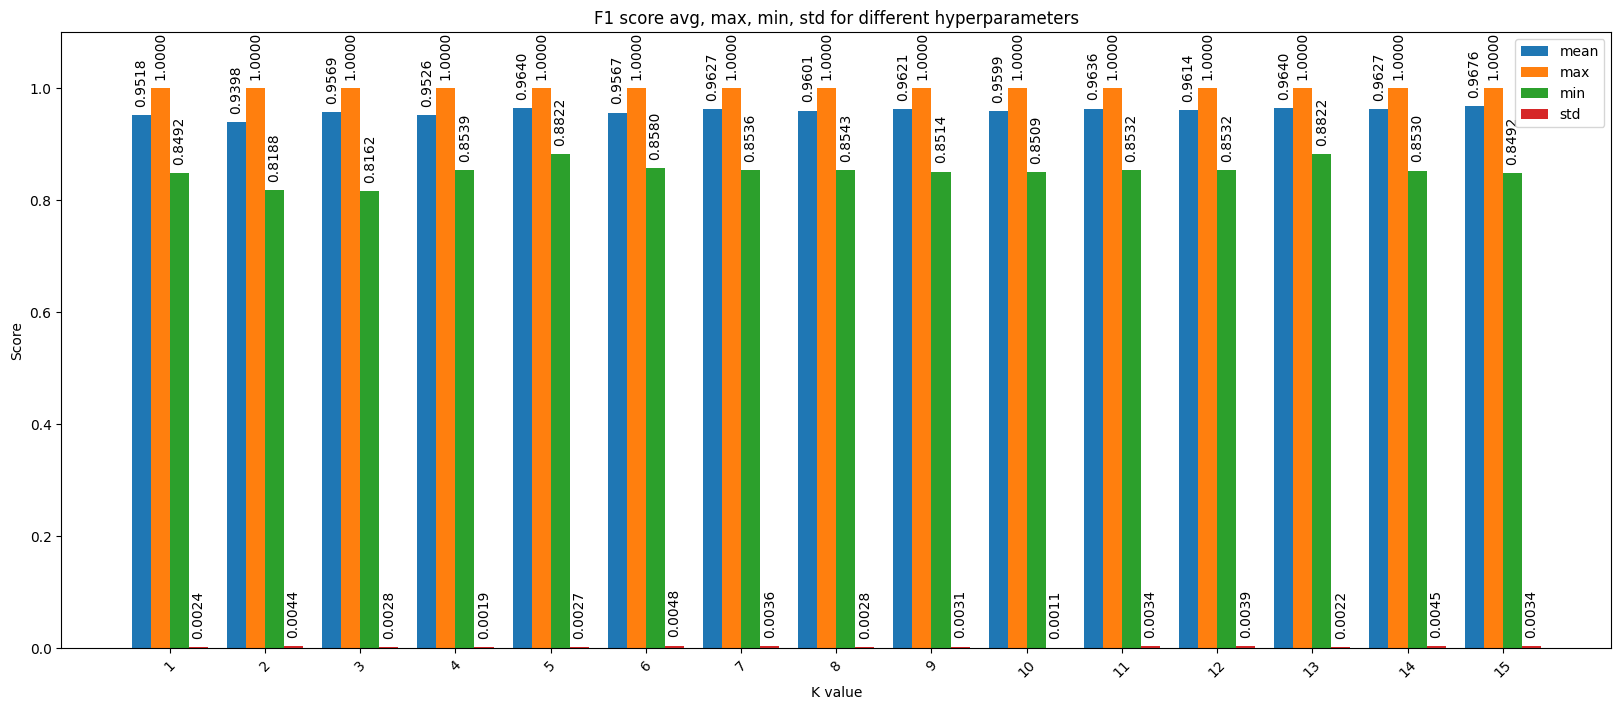

In [326]:
test_values(X, y, get_k_values_results)

#### 5.2 sprawdzenie różnych metryk dla 5-fold, k równego 3 oraz głosowania większości

Pojedyncza obserwacja wyników dla różnych metod liczenia odległości ukazuje, iż miara chebysheva radzi sobie zdecydowanie gorzej od miary manhatan oraz euklides.

Dla pozostałych dwóch różnice są bardzo zależne od obserwacji, nie można zaobserwować charakterystycznych zmian w zależności od uruchomienia eksperymentu.

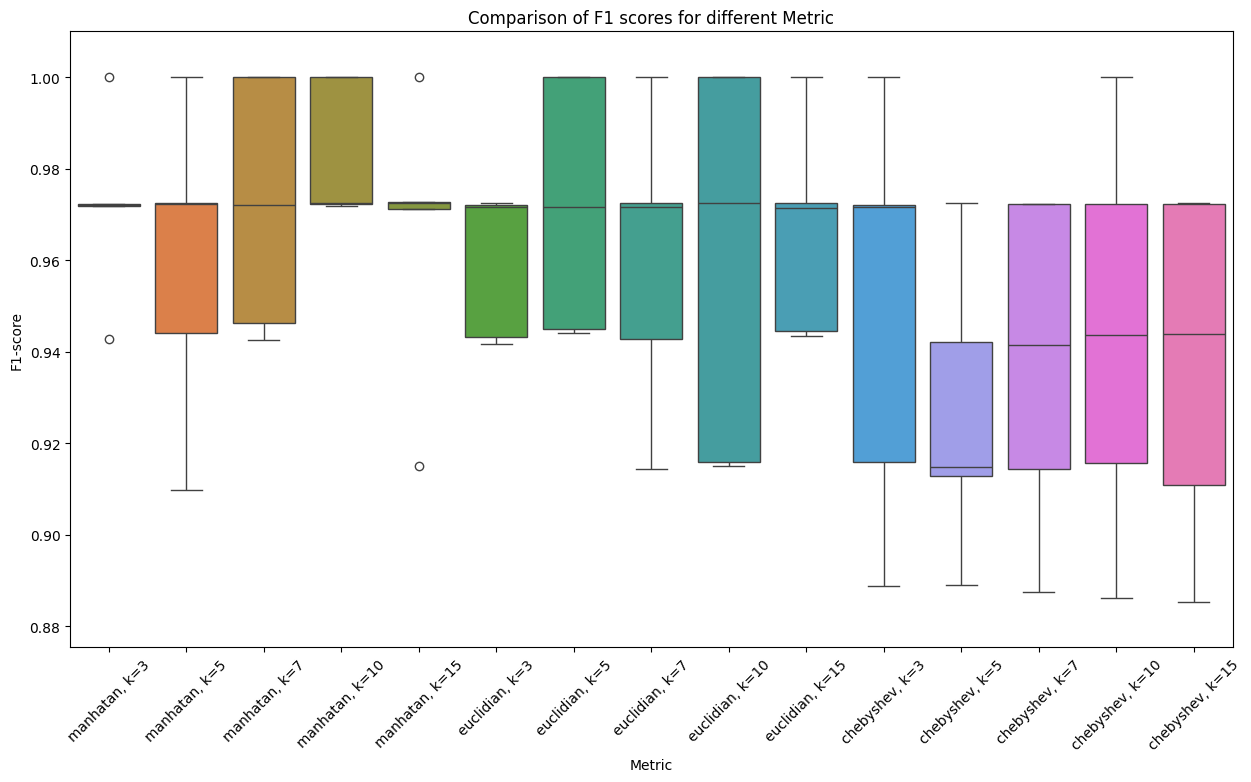

In [327]:
plot_metric_values(X, y, knn_crossvalidation)

Dla wersji statyfikowanej różnice między chebyshevem, a pozostałymi się zmniejszyły. 

Ponoewanie nie w sposób podać różnice dla odległości manhatan oraz euklides dla pojedynczego eksperymentu.

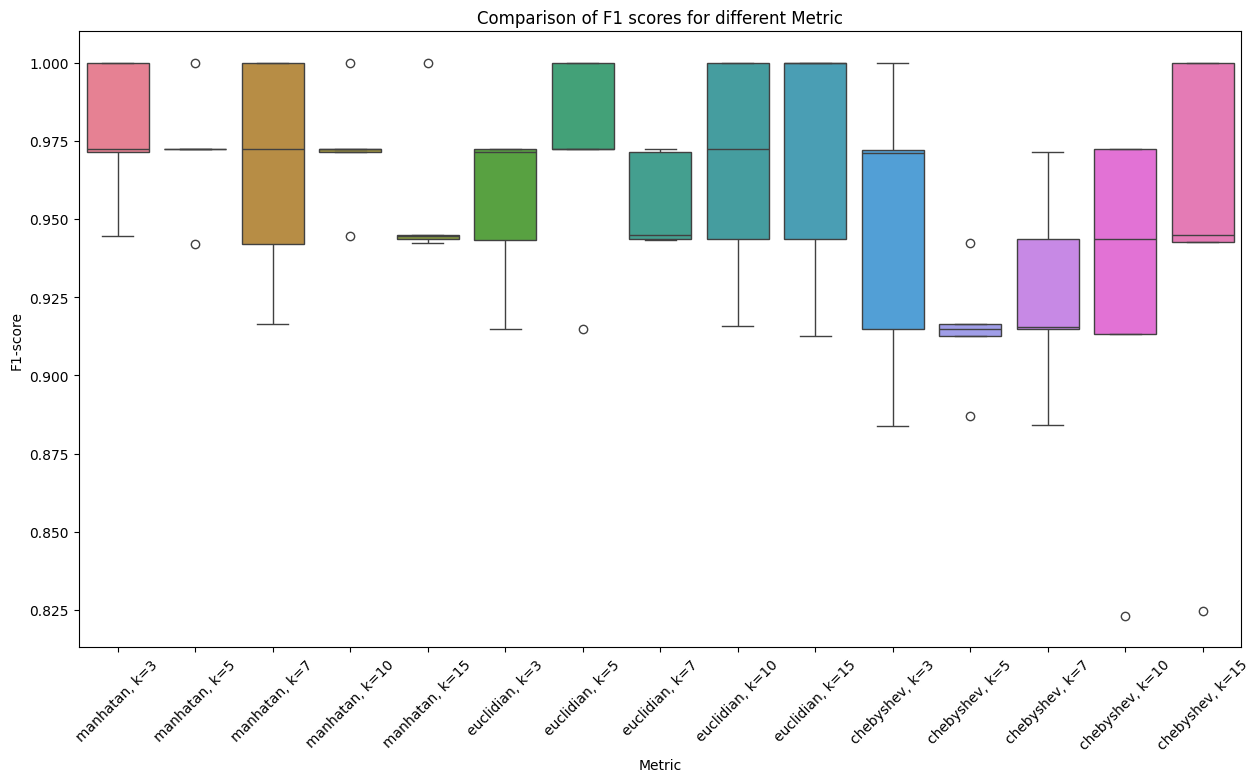

In [328]:
plot_metric_values(X, y, knn_crossvalidation_stratified)

Test dla 50 iteracji ukazał, iż średnia wartość f1 dla odległości manhatan poradziła sobie najlepiej w zadaniu klasyfikacji. 

Miara euklidesowa wyniosła niższe wartości minimalne f1-score oraz niższe wartości średnie f1-score na przestrzeni różnych k od odległości manhatan.

Ponownie można zaobserwować, iż chebyshev jest miarą odległości, która radzi sobie najgorzej z zadaniem, ukazując najniższe wartości średnie oraz najniższe wartości minimalne.

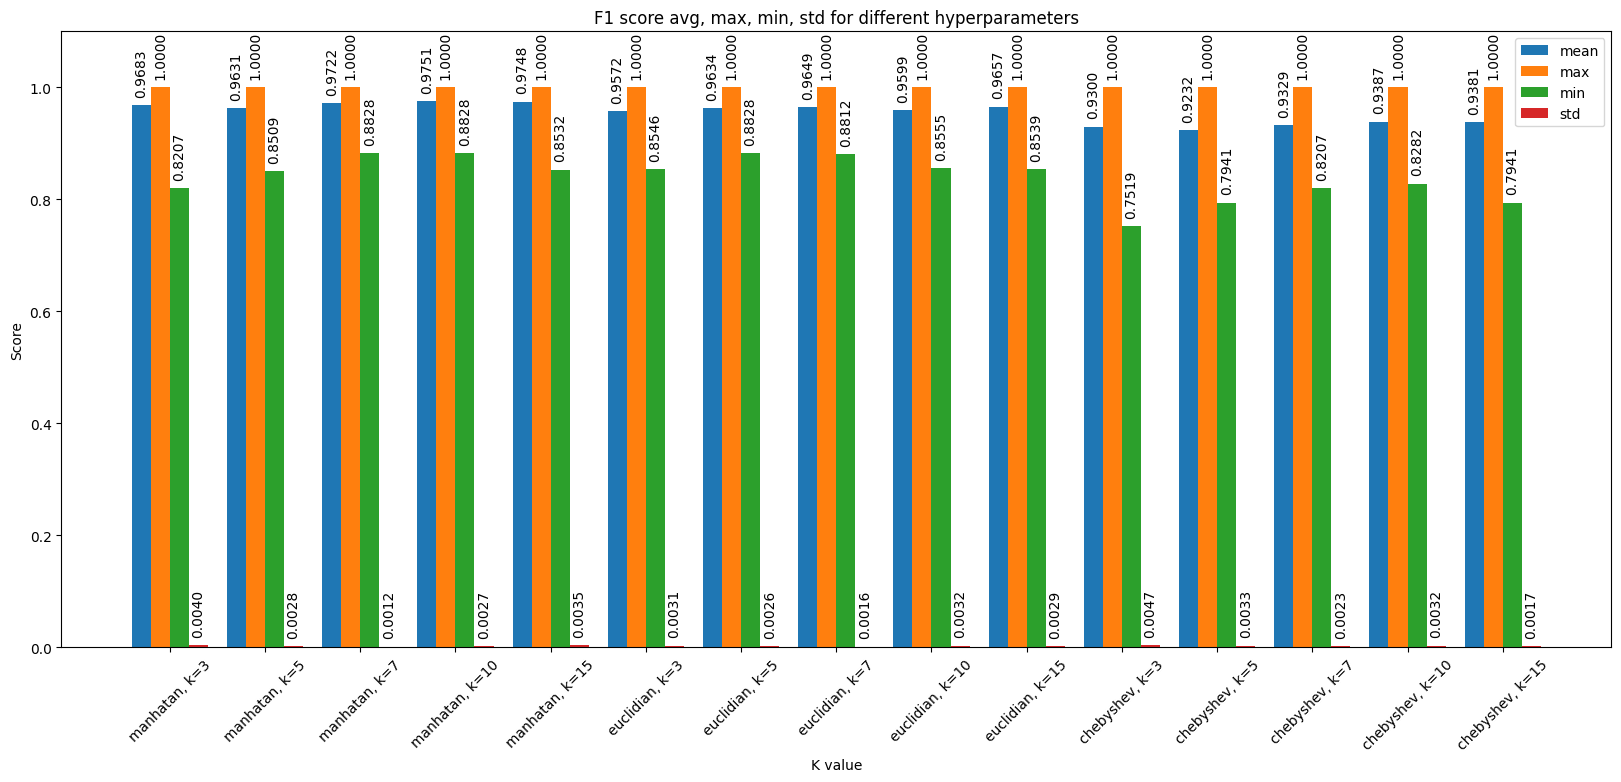

In [56]:
test_values(X, y, get_metric_results)

#### 5.3 Sprawdzenie różnych głosowań dla 5-fold, k równego 3 oraz metryki euklidesowej

Pojedyczna obserwacja eksperymentu ukazuje, iż głosowanie większościowe posiada najwyższą stabilność oraz skuteczność.

Głosowanie na podstawie odległości jest ponownie stosunkowo stabilne, lecz posiada większy rozrzut wartości.

Podejście własne ukazuje bardzo niskie wartości F1, które rosną wraz ze zwięszeniem wartości k.

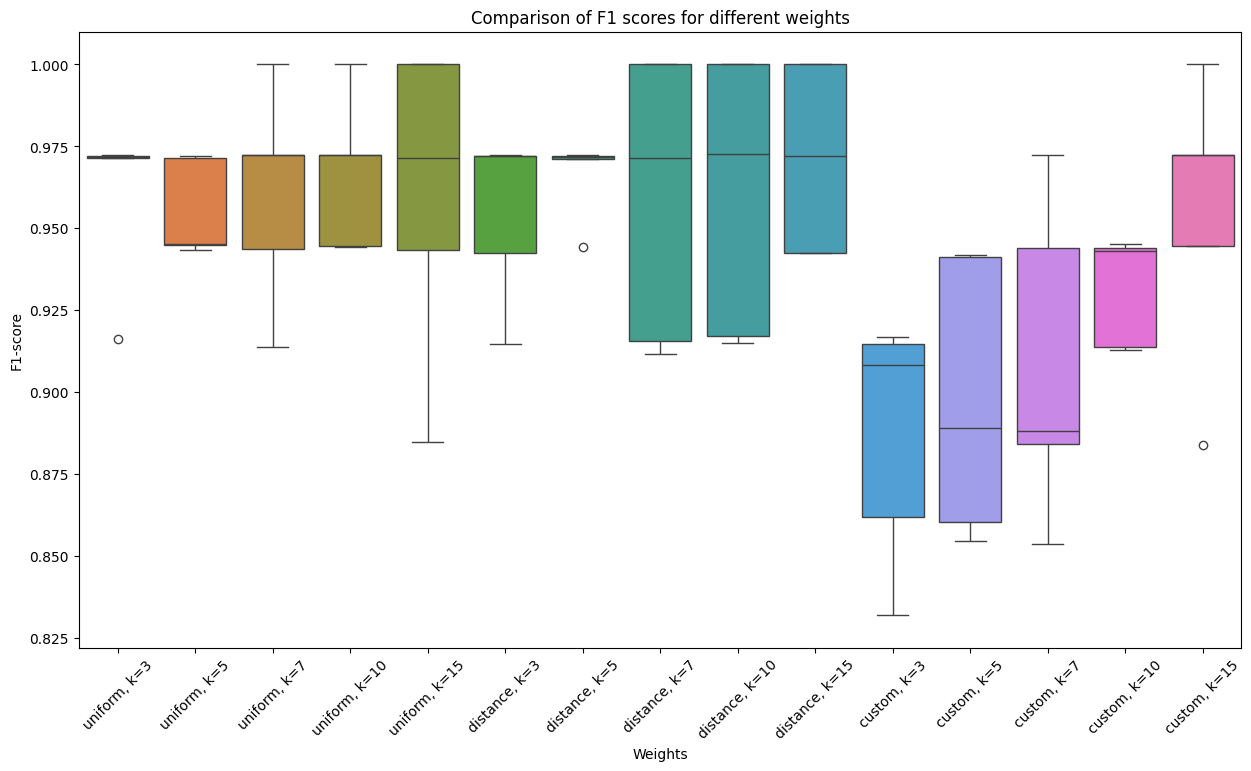

In [57]:
plot_weight_values(X, y, knn_crossvalidation)

Zastosowanie stratyfikacji wyrównało różnice między głosowaniem więszkościowym, a odległościowym. 

Nie wpłynęło to jednak na niską wydajność podejścia włąsnego do głosowania, które ponownie pozostawia bardzo niskie wartości F1 w porównaniu do reszty.

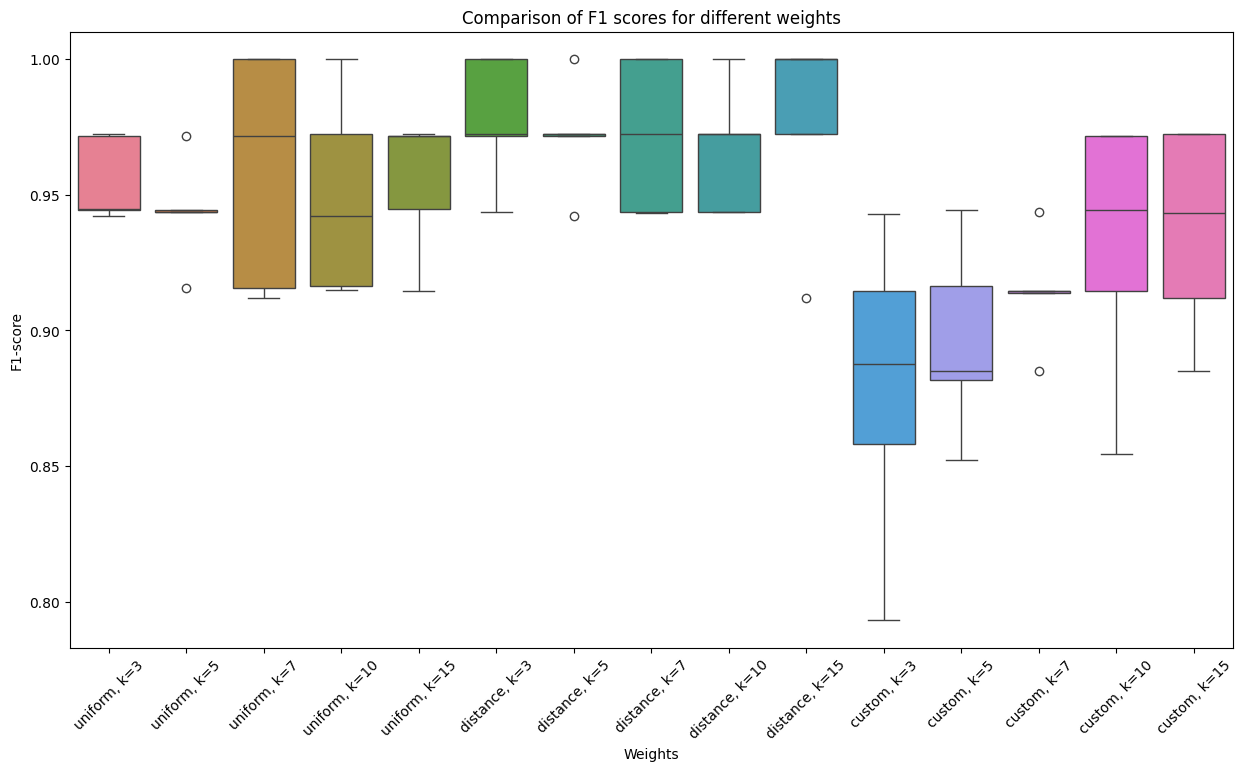

In [58]:
plot_weight_values(X, y, knn_crossvalidation_stratified)

Głosowanie więszkościowe ukazuje najlepsze wyniki, lecz niskie wartości minimalne. Odchylenie standardowe potwierdza tu niską stabilnośc wyników.

Głosowanie odległościowe jest stabilniejsze oraz pozisada wyższe najniższe wartości.

Najgorzej z zadaniem radzi  sobie autorka implementacja głosowania w której to wyniki są zdecydowanie gorsze na przestrzeni wszystkich wartości k.


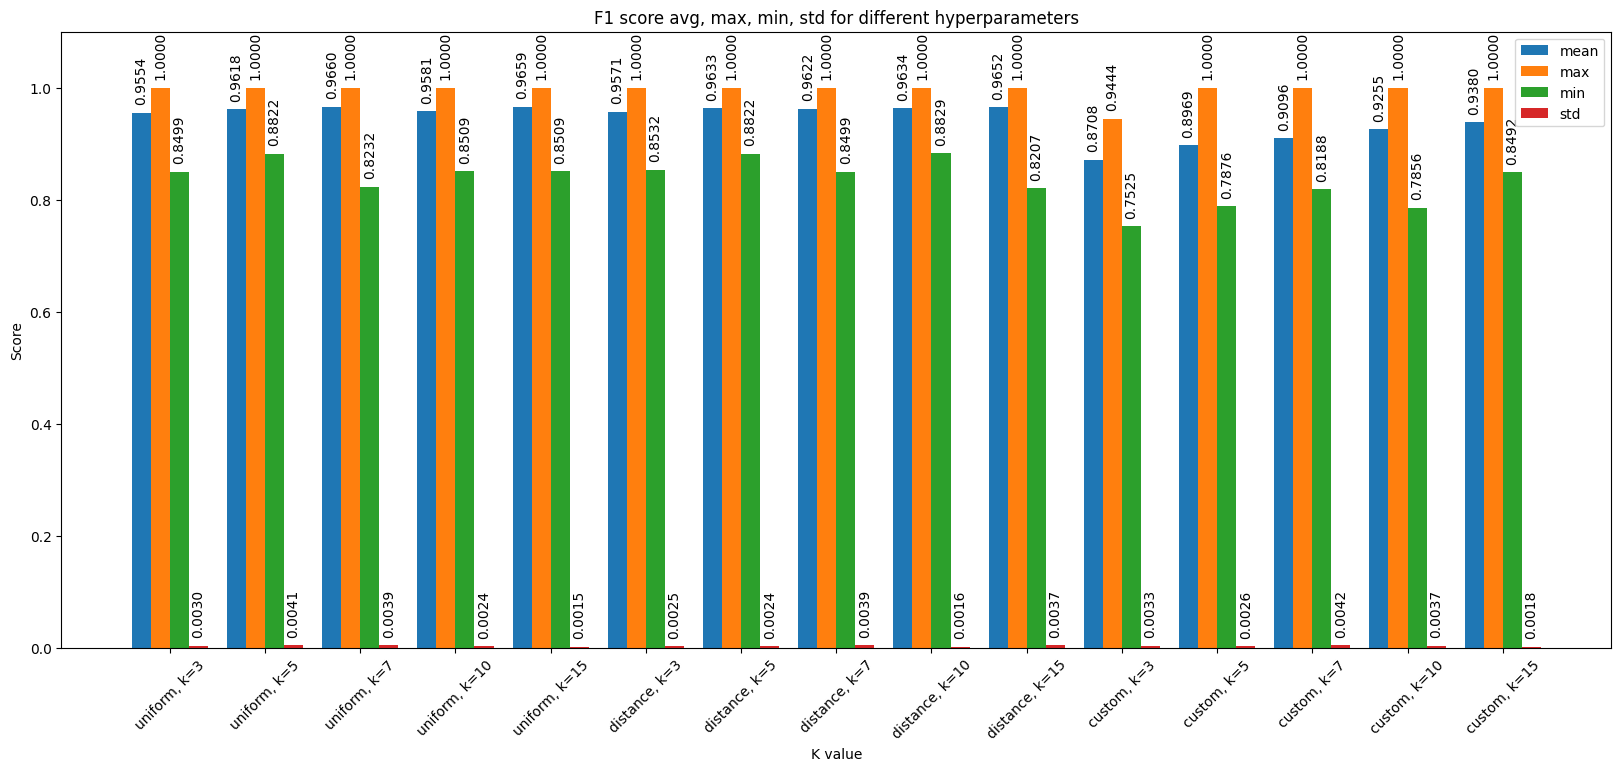

In [331]:
test_values(X, y, get_weight_result)

### 3. Polish Bankruptcy Companies

In [334]:
polish_companies_bankruptcy = fetch_ucirepo(id=365)

In [335]:
X = polish_companies_bankruptcy.data.features
y = polish_companies_bankruptcy.data.targets

#### 1. Uruchomienie algorytmu klasyfikacji k-nn dla zbioru PCB – używamy  wartości parametrów domyślnych (np. k=5, odległość Euklidesa, głosowanie większościowe)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
transformations = [SimpleImputer(strategy="median"), StandardScaler()]

for transformation in transformations:
    transformation.fit(X_train)
    X_train = transformation.transform(X_train)
    X_test = transformation.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

#### 3. Analiza macierzy pomyłek oraz metryk dla eksperymentu

Klasa "not bankruptcy"
1. 8223 przypadki zostały poprawnie sklasyfikowane jako "not bankruptcy".
2. 28 przypadków błędnie sklasyfikowano jako "bankruptcy" (fałszywe alarmy).

Klasa "bankruptcy"
1. 17 przypadków zostało poprawnie sklasyfikowanych jako "bankruptcy".
2. 413 przypadków błędnie zaklasyfikowano jako "not bankruptcy" (model nie wykrył bankructwa).


Występuje tu silnie zauważalny problem z wykrywaniem firm, które faktycznie zbankrutowały – tylko 17 na 430 przypadków zostało poprawnie zidentyfikowanych.

In [62]:
target_names = ['not bankruptcy', 'bankruptcy']

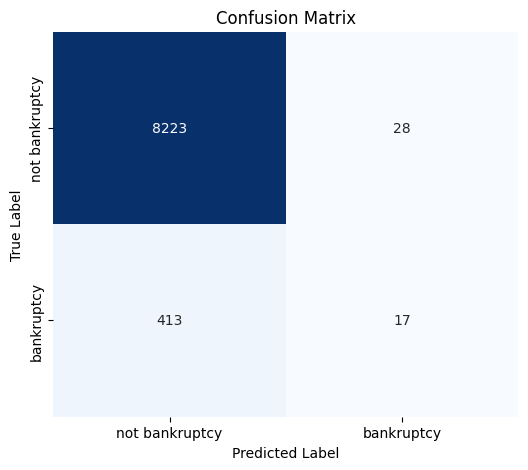

In [63]:
cm = confusion_matrix(y_test, y_hat)
plot_cm(cm, target_names)

Poniższy wykres silnie ukazuje dysproporcję w reprezentacji klas dla PCB dataset.

Firmy, które nie zbankrutowały osiągają "wysokie" wyniki, ponieważ posiadają bardzo wysoką reprezentacje, z kolei firmy zbankrutwane ukazują bardzo niskie wyniki, ponieważ klasyfikator knn częściej jest w stanie znaleźć sąsiada, który jest klasą "bankruptcy" 

accuracy: 0.9491994009906692


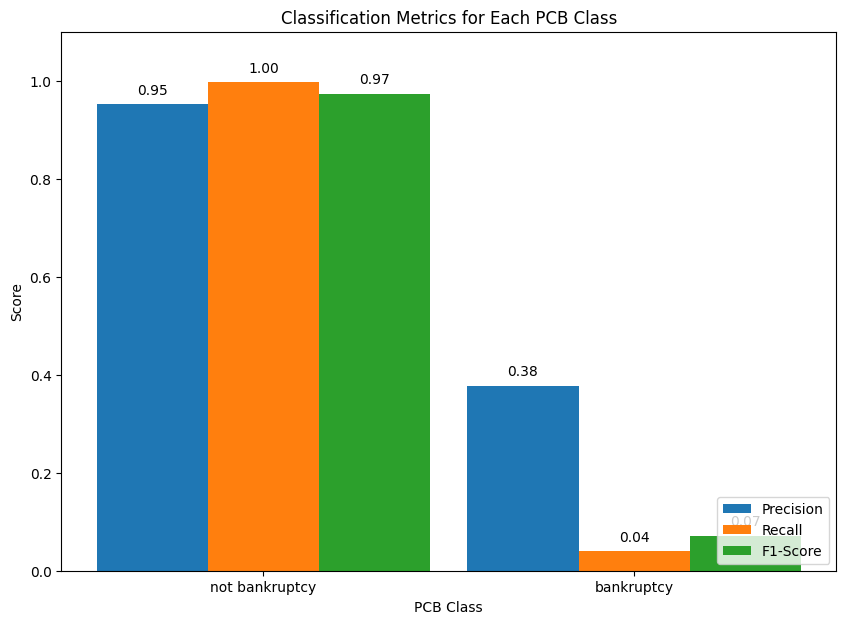

In [64]:
report = classification_report(y_test, y_hat, target_names=target_names, output_dict=True)
print(f'accuracy: {report["accuracy"]}')
plot_classification_report(report, target_names, "PCB")

Macro average adekwatniej ukazuje średni performance klasyfikatora na tym zbiorze danych, ukazując jak niskie są wyniki dla obydwu klas.

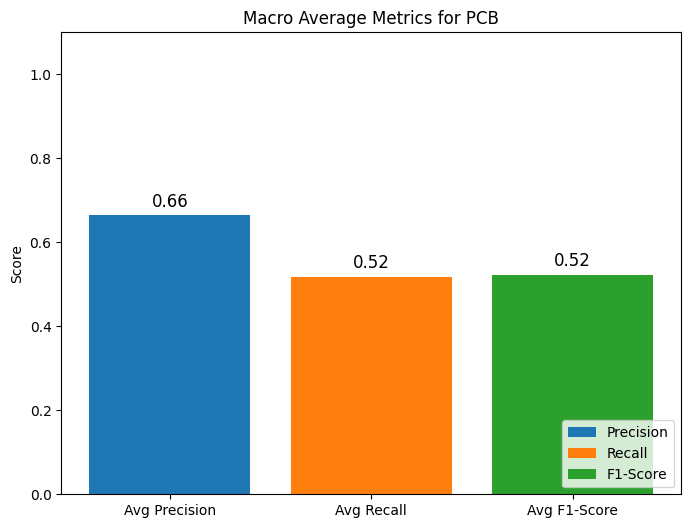

In [65]:
plot_macro_avg(report, "PCB")

#### 4. Implementacja procedury walidacji  krzyżowej (ang. crossvalidation)  dla  różnych  rozmiarów, tj. 2-fold, 5-fold, 10-fold i sprawdzenie jak wpływa na wyniki klasyfikatora k-nn dla zbioru PCB. Jak liczba foldów wpływa na skuteczność? 

Dla pojedynczego eksperymentu można zaobserować, iż mediana wyników jest bardzo podobna między różną wartością foldów. 

Dla 10-fold jesteśmy w stanie osiągnąć najwyższy, lecz jednocześnie najniższy wynik.

Wraz ze zmniejszeniem liczby foldów wartości się stabilizują, dając medianę pozostałych.

average: 0.9303736880723017
 max_f1: 0.9305371732830912
 min_f1: 0.9301992276412825
 std_f1: 0.00013818382876609625


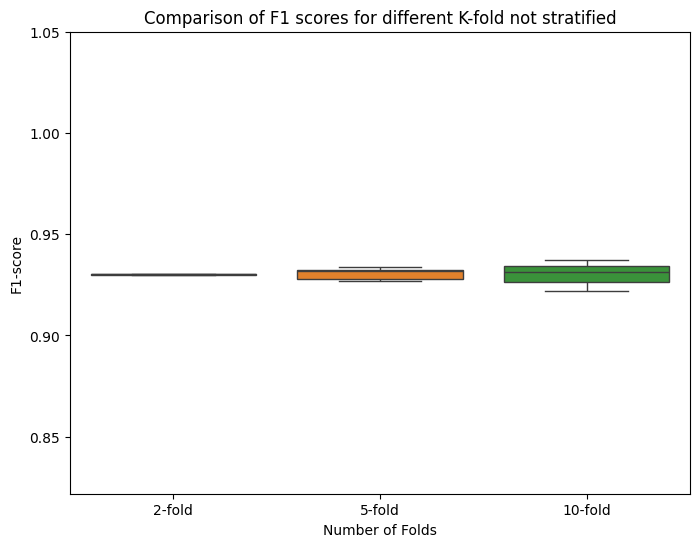

In [66]:
single_3_folds_test(X, y, knn_crossvalidation, "not stratified")

Wykres ukazuje jak ogromny wpływ ma stratyfikacja dla datasetu PCB. Po dokonaniu stratyfikacji wyniki między foldami znacząco się ustabilizowały, dzięki równomiernemu rozkładowi klas. Poprzednio mogło dość do sytuacji, gdzie więszkość zbankrutowanych przedsiębiorstw trafiło do jednego folda, zwięszając jego wyniki f1, a zmniejszając pozostałe.

average: 0.9304004103700018
 max_f1: 0.9310027637179378
 min_f1: 0.9299914483638257
 std_f1: 0.00043492516188912284


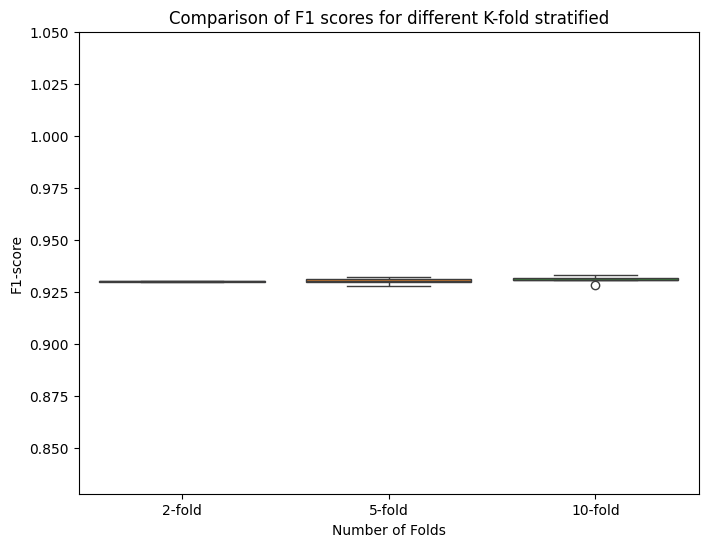

In [67]:
single_3_folds_test(X, y, knn_crossvalidation_stratified, "stratified")

Dla 50 iteracji testu między różnymi foldami można zaobserwować:
1. Większa liczba foldów nieznacznie poprawia średnią skuteczność modelu
2. 10-fold daje najwyższą maksymalną wartość F1-score, co sugeruje, że w niektórych podziałach model lepiej dopasowuje się do danych.
3. Im więcej foldów tym zwiększa się odchylenie standardowe
4. Potwierdza to fakt, iż przy 10-fold posiadamy najniższą wartość minimalna i najwyższą maksymalna

In [68]:
test_3_folds_metrics(X, y, 6)

2-fold
 avg: 0.9302230487299429, max: 0.9309749573057732, min: 0.9292303042022168, std: 0.0004502875747534223
5-fold
 avg: 0.9302600437655671, max: 0.9317668480409153, min: 0.9284831014035946, std: 0.0007781798036475854
10-fold
 avg: 0.9304364886925426, max: 0.933831115498679, min: 0.9270491256911091, std: 0.001454295143173028


Zaskakująco test dla 10 iteracji ukazał brak widocznych różnic między statyfikacją a jej brakiem w kwestii odchylenia sstandardowego. Jest to bardzo dziwny wynik zważywszy na pozostałe wykresy w eksperymentach, które dla startyfikacji ukazały o wiele stabilniejszy f1-score.

In [ ]:
compare_stratify_k_folds(X, y, 10)

normal average: 0.9302017780190498
 normal max_f1: 0.9307615003506257
 normal min_f1: 0.9293353811493039
 normal std_f1: 0.00014706923379679686

stratified average: 0.930325215709313
 stratified max_f1: 0.9309906191098708
 stratified min_f1: 0.9296720653299682
 stratified std_f1: 0.00015231805393940869



differences between normal and stratified
average: -0.00012343769026323947
max_f1: -0.00022911875924513936
min_f1: -0.00033668418066423733
std_f1: -5.248820142611825e-06


#### 5. Sprawdzenie różnych wartości parametrów klasyfikatora k-nn dla zbioru PCB

#### 5.1 Sprawdzenie różnych wartości k dla 5-fold, metryki euklidesowej oraz głosowania większości

Dla pojedynczej obserwacji wyników dla różnych wartości k dla głosowania więszkościowego można zaobserować, iż k=1 posiada zdecydowanie najniższy wynik. Może to być spowodowane problamatycznością punktów bardzo blisko punktów z klasą bankructwa.

Jeśli punkt z klasą bankructwa ma wokół siebie kilka punktów z brakiem bankructwa może wielokrotnie nieprawidłowo je sklasyfikować, tak samo funkcjonuje to w drugą stronę. Dla zbiorów silnie niezbalansowanych klasowo k=1 daje bardzo niskie wyniki.

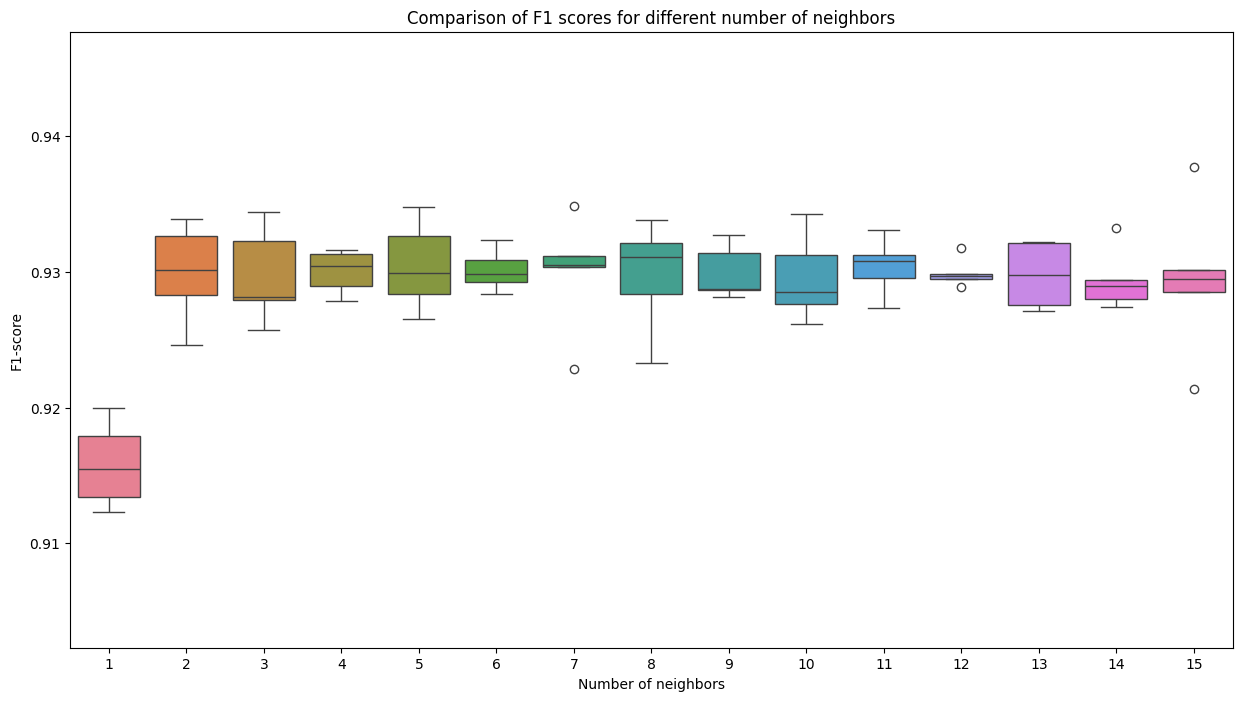

In [70]:
plot_k_values(X, y, knn_crossvalidation)

Stratyfikacja zdecydowanie ustabilizowała wyniki zmniejszając ich rozrzut. Poza tym wykres nie ukazuje charaktetystycznych zależności.

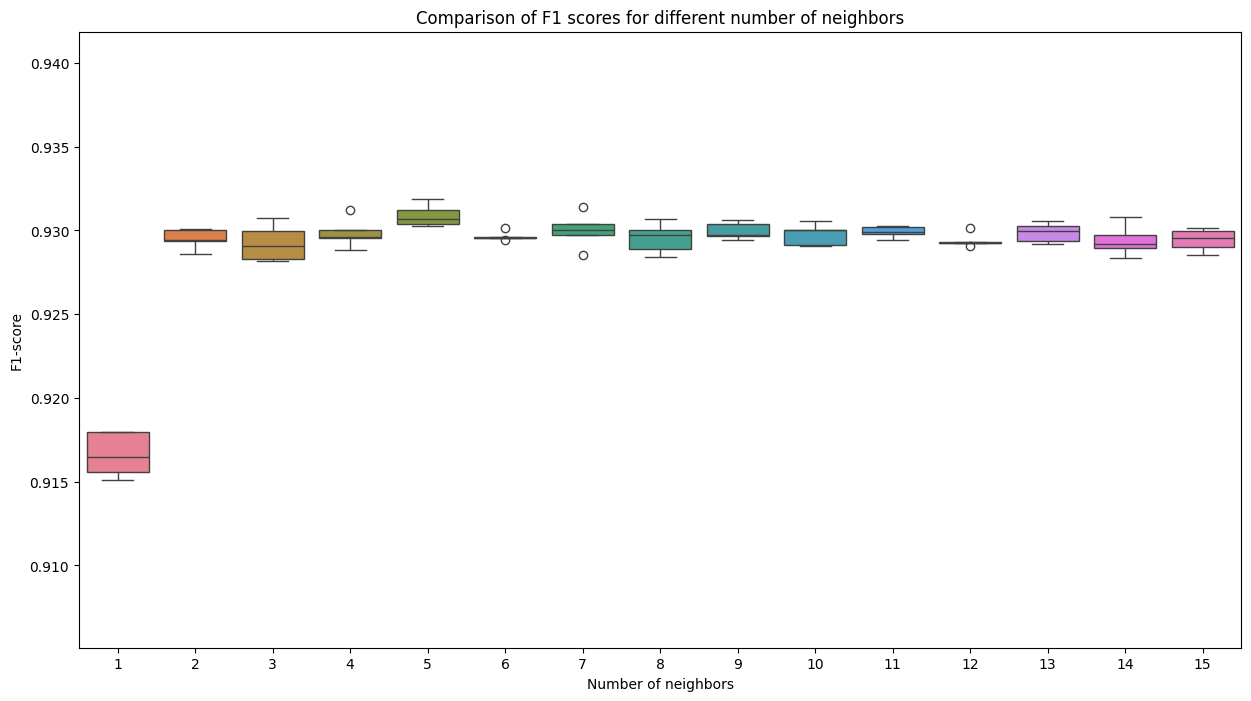

In [71]:
plot_k_values(X, y, knn_crossvalidation_stratified)

Uśrednienie wyników dla 10 iteracji ukazało, iż wartość k = 1 jest bardzo złym wyborem, który zmniejszą wynik f1 dla naszego klasyfikatora.

Dla pozostałych wartości k można zaobserwować, iż wartości średnie metryki f1 są takie same na przestrzeni różnych wartości k. Sugeruje to, iż knn jest słabym klasyfikatorem dla tego problemu i parametry k nie mają na to najmniejszego wpływu.

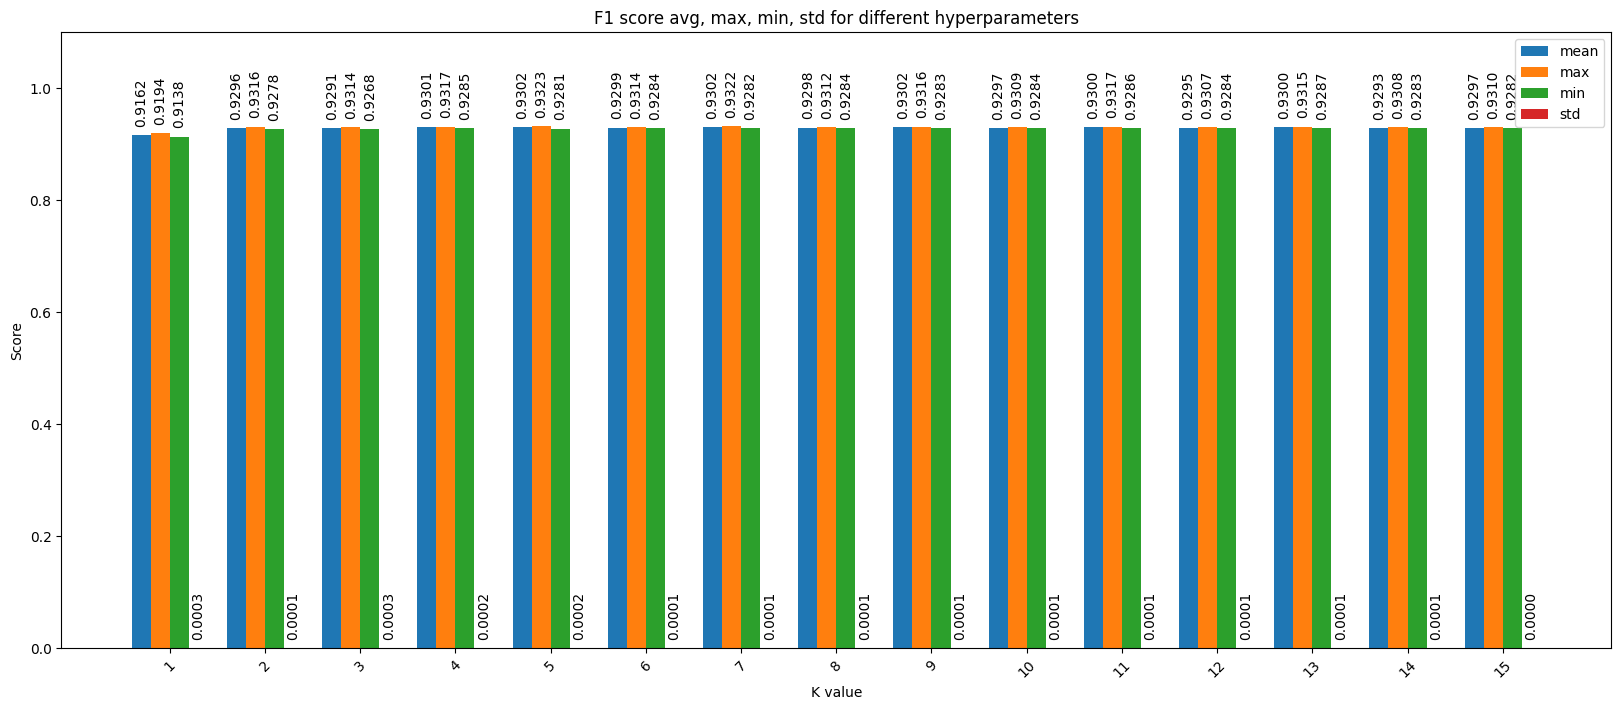

In [72]:
test_values(X, y, get_k_values_results, 10)

#### 5.2 sprawdzenie różnych metryk dla 5-fold, k równego 3 oraz głosowania większości

Dla pojedynczej obserwacji wartości f1 dla różnych sposobów liczenia odległości można poraz pierwszy zauważyć, iż miara chebyshev stała się uzyteczna. Osiąga ona równie wysokie wyniki co alternatywy.

Pojedyncza obserwacja ukazuje, iż euklides daje najwyższą stabilność wyników, jednocześnie dając wyniki najbardziej pośrodku spośród opcji.

Miara manhatanu daje wyższe wyniki, lecz większy rozrzut w zależności od foldu.

Z kolei miara chebysheva ze względu na niestabilność posiada pojedyncze wyniki na wysokim poziomie, lecz medianę na najniższym.

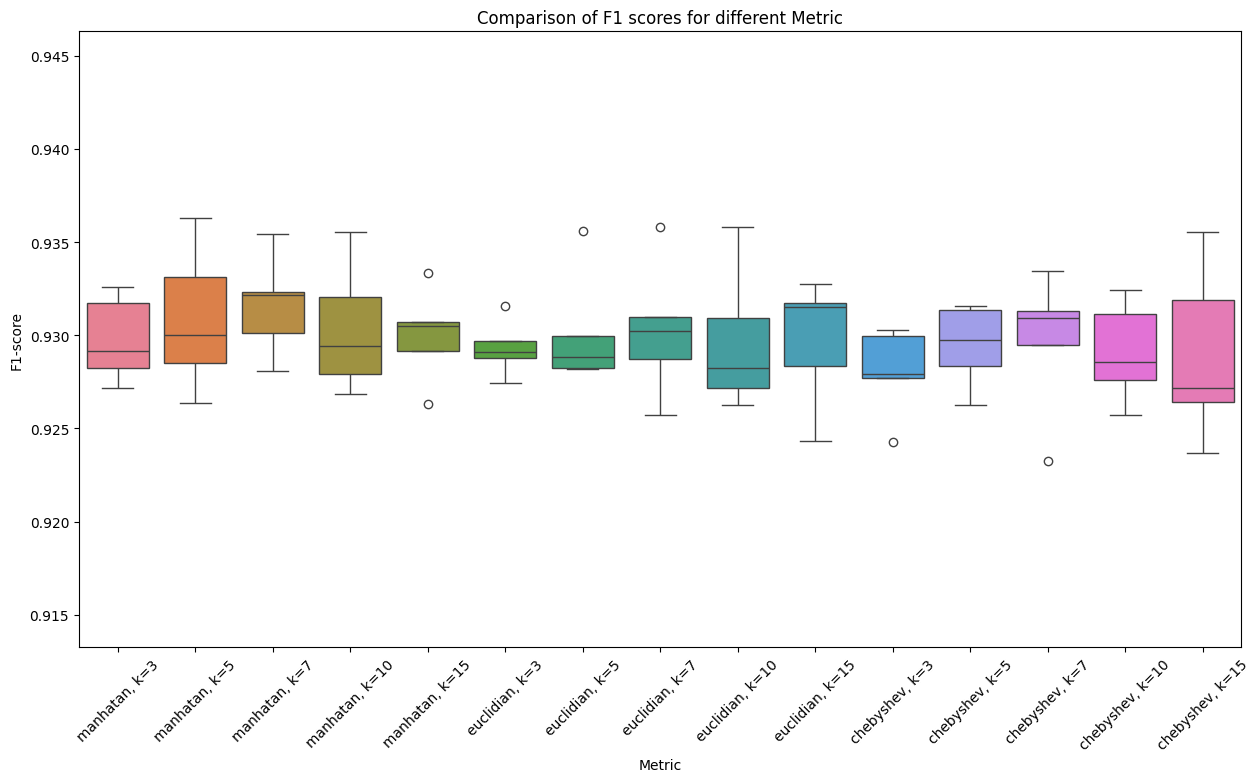

In [73]:
plot_metric_values(X, y, knn_crossvalidation)

Wykres po stratyfikacji jest zdecydowanie łatwiejszy do zinterpretowania. Ukazuje przewagę odległości manhatan dla wyższych wartości k w porównaniu z wynikami f1 pozostałych opcji.

Wykres ukazuje, iż miara euklidesa ponownie ukazuje najbardziej stabilne wartości, które nie są aż tak wysokie jak wartości f1 dla manhatan.

Chebyshev mimo stratyfikacji osiąga najmniej stabilne wyniki z najwyższym dla k=7.

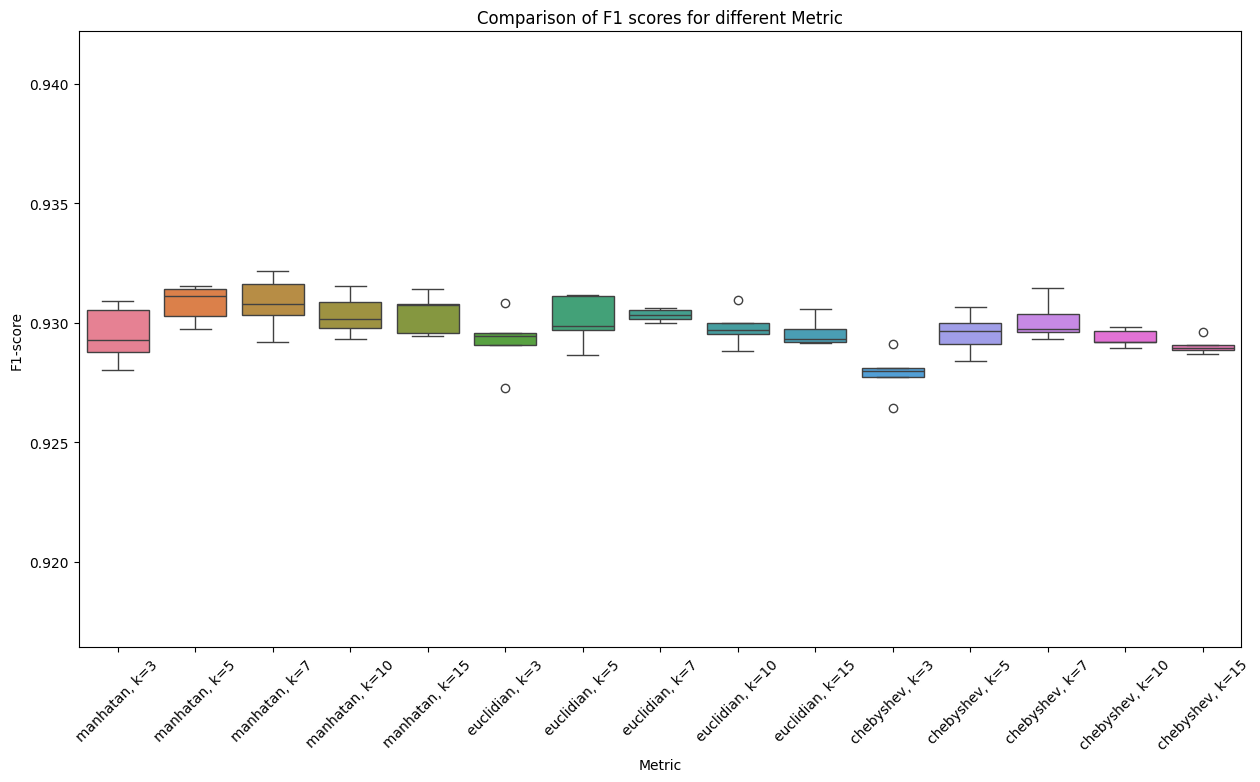

In [74]:
plot_metric_values(X, y, knn_crossvalidation_stratified)

Uśrednienie wyników dla 10 iteracji ukazało, iż najlepszą miarą odległości dla knn jest manhatan, dająca minimalnie wyższą średnią wartość f1 dla różnych wartości k.

Miara euklidesowa znajduje się na drugim miejscu względem średniej wartości f1, lecz na pierwszym względem stabilności eksperymentów.

Miara Chebysheva poradziła sobie najgorzej względem średniej wyników f1, lecz zadziwiająco jej wyniki spoiadają najniższą rozbierzność.

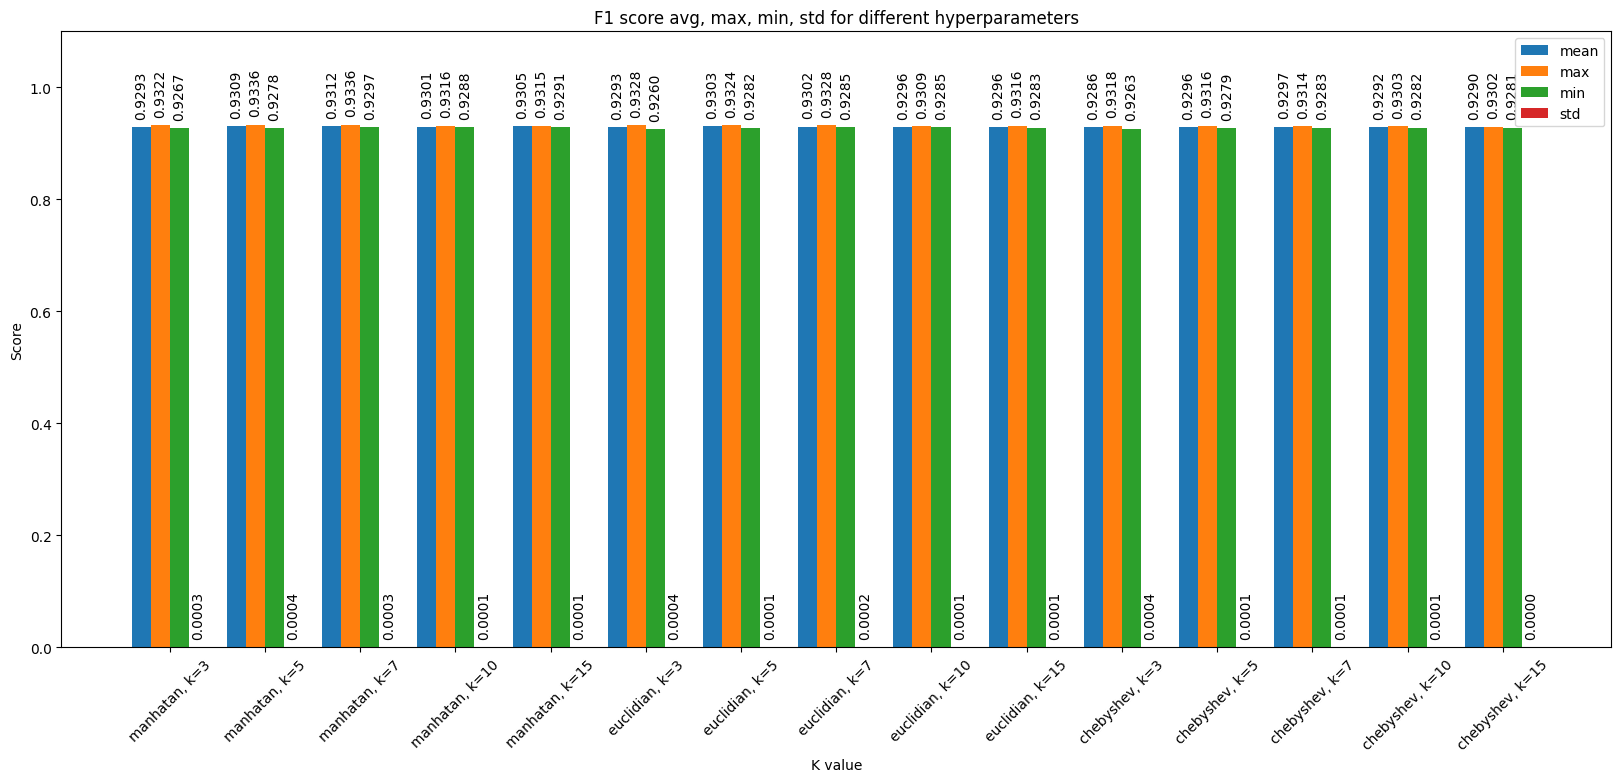

In [75]:
test_values(X, y, get_metric_results, 10)

#### 5.3 Sprawdzenie różnych głosowań dla 5-fold, k równego 3 oraz metryki euklidesowej

Dla pojedynczej obserwacji, wykres ukazuje, iż głosowanie większościowe daje najstabilniejsze wyniki dla różnych wartości k. 

Wynik f1 między pudełkami jest stosunkowo podobny, lecz należy zwrócić uwagę na liczność zbiorów.

Liczenie przynależności do klasy na podstawie sumy dystansów euklidesowych daje zdecydowanie najwyższe wyniki, lecz nie zapewnia aż tak dobrze ich stabilności.

Implementacja funkcji liczenia wag autora okazała się dawać najwyższe, lecz najmniej stabilne wyniki.

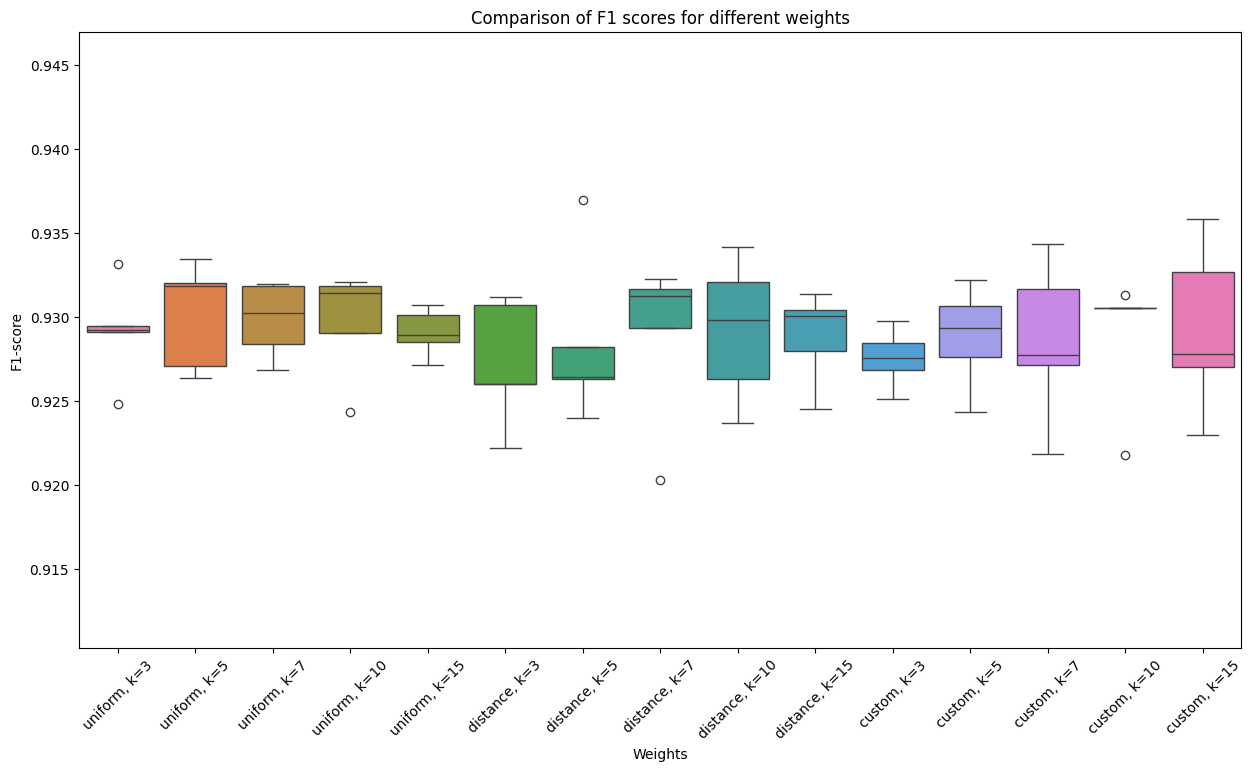

In [76]:
plot_weight_values(X, y, knn_crossvalidation)

Dla danych stratyfikowanych można zaobserwować podobne zależności z różnicą dla głosowania większościowego z k=3.

Głosowanie więszkościowe dla k=5 ukazało najwyższy wynik f1, lecz stabilność tego głosowania zmalazła.

Głosowanie na podstaie sunmy dystansów euklidesowych ukazało najniższe wyniki z najlepszą stabilnością.

Autorka implementcja sposobu wyliczania wag w dalszym ciągu zapewnia bardzo niestabilne wyniki, które nie są już najwyższynmi.

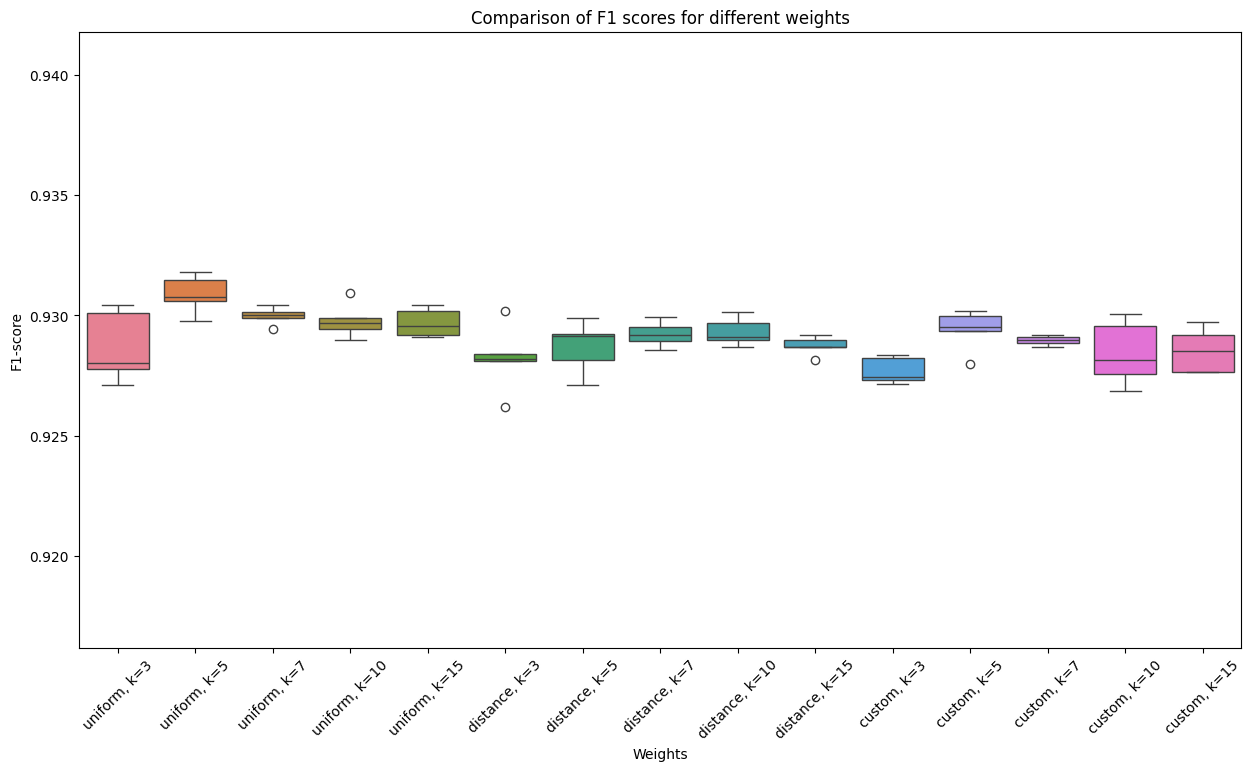

In [77]:
plot_weight_values(X, y, knn_crossvalidation_stratified)

Uśrednienie wyników dla 6 iteracji ukazuje, iż głosowanie większościowe jest ponownie najlepszym wyborem. Daje ono najwyższe średnie wartości f1.

głosowanie odległościowe okazało się równie dobre, co autorka implementacja wyliczenia wag, gdzie ich wyniki były gorsze o 1 punkt procentowy od głosowania więszkościowego.

Wszystkie metody daja stosunkowo podobną stabilność wyników.

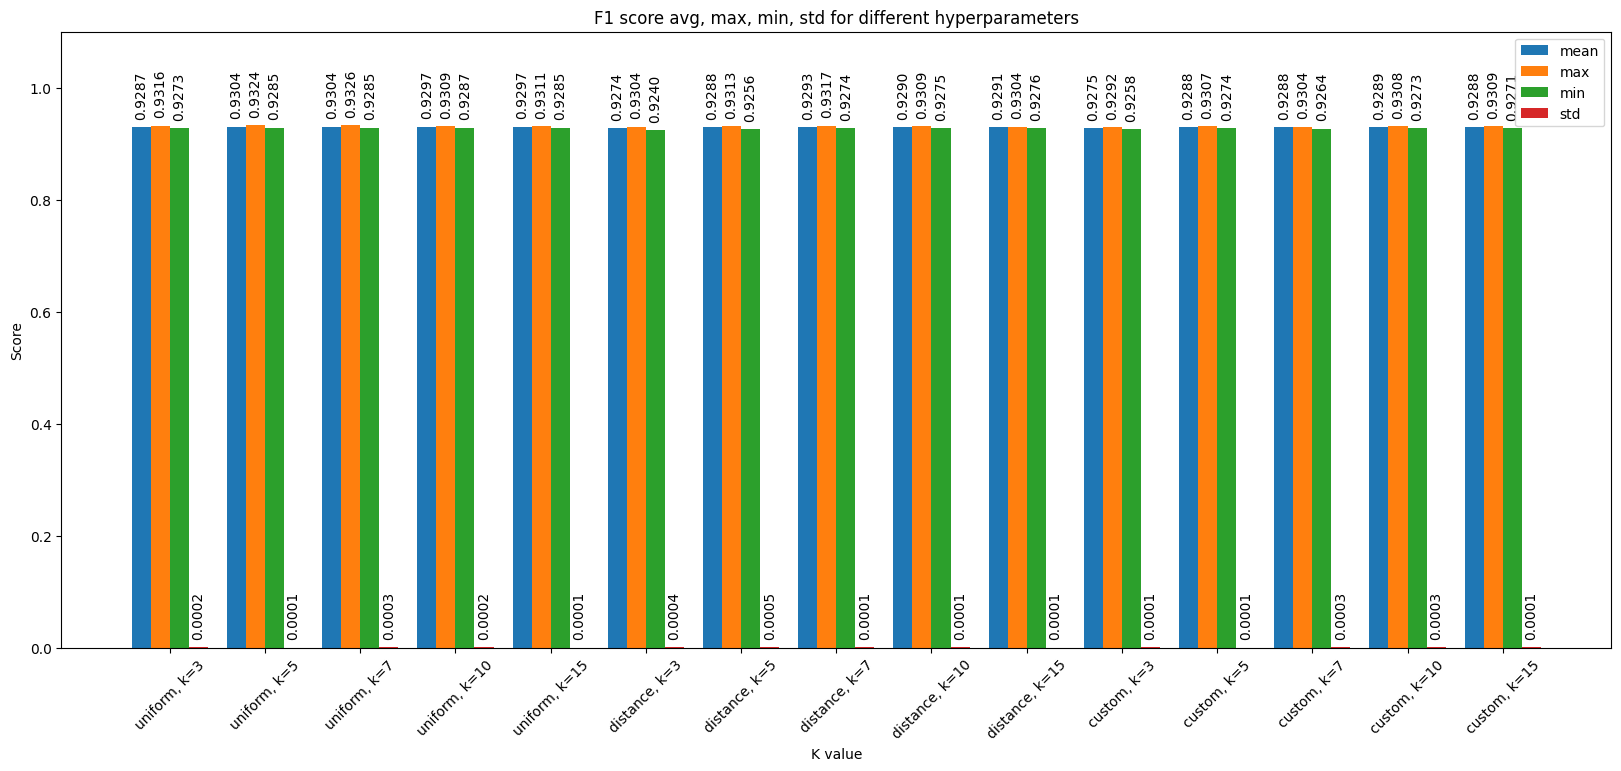

In [337]:
test_values(X, y, get_weight_result, 6)

## 6. Podsumowanie

Celem laboratorium było przeprowadzenie eksperymentów z klasyfikacją za pomocą algorytmu KNN. Analizowano wpływ różnych hiperparametrów na wyniki klasyfikacji na trzech zbiorach danych: Iris, Wine oraz Polish Bankruptcy Companies. Oceny dokonano na podstawie metryk:

1. Accuracy
2. Precision
3. Recall
4. F1-score

Dodatkowo testowano zastosowanie cross-validation jako alternatywnej metody podziału zbioru na treningowy i testowy.

Następnie dokonano internsywnych porównań dla parametrów foldów, k, sposobów głosowań oraz sposobu liczenia odległości.

Jednym z aspektów było także porównanie wpływu stratyfikacji na wyniki eksperymentów oraz zastanowanie się nad metryka oraz formą ukazywania wyników eksperymentów.

#### Zbiór Iris

Iris okazał się najprostszym zbiorem do klasyfikowania za pomocą KNN. Mała liczba cech z silną możliwością separacji spowodowały, iż dobieranie odpowiednich parametrów nie miało dużego znaczenia - algorym i tak dobrze sobie radził.

Widocznymi obserwacjami były różnice w średnich wynikach f1 w zależności od parzystosci parametru k.

Statyfikacja nie miała tu większego znaczenia ze względu na równomierny rozkład klas, lecz powinna być stosowana jako dobra praktyka.

#### Zbiór wine

Zbiór wine był trudniejszym datasetem. Większa liczba atrybutów oraz cięższa separowalność klas spowodowały, iż dobór parametrów miał kluczowe znaczenie.

Eksperymenty dowiodły, iż większa liczba foldów statystycznie zwięsza średni f1 score, lecz zmniejsza stabilność wyników. 

Stratyfikacja okazała się być znacząca ze względu na nierówny rozkład klas.

Eksperyment dowiódł iż k, które nie powinno być parzyste, jeżeli jest małe, osiągało najwyższy f1-score przy wyższych wartościach tego parametru.

Kolejnym ważnym aspektem była miara odległości, w tym przypadku manhatan okazał się być najwydajniejszym.

Na końcu sposób głosowania. Tu najlepsze wyniki osiąganęło głosowanie większościowe

Walidacja stratyfikowana miała tu znaczenie ze względu na nierówomiery rozkład klas. Umożliwiła każdemu foldowni na równomierny rozkład proporcji klas.

#### Zbiór PCB

Zbiór pcb okazał się najtrudniejszym, ze względu na bardzo ubogi rozkład reprezentacji klas oraz wiele brakujących wartości.

Liczba foldów miała duże znaczenie względem odchylenia standardowego, gdzie dla 2-fold było ono najniższe, lecz średnie wartości f1 były stosunkowo takie same między różnymi podziałami 

Dobór parametru k okazał się być mało znaczący, poza k=1, gdzie klasyfikator osiągał skrajnie niskie wyniki.

Wybór odpowiedniej metody liczenia odległości ukazał, że ten hiperparametr był znaczący. Odległość manhatan dawała najlepsze wyniki pomimo bycia najrpostszą.

Finalnie sposób głosowania dla głosowania większościowego okazał się być najlepszy

Stratyfikacja była tu konieczna, aby wyniki były stabilniejsze.


### Ogólne wnioski

Klasyfikaator knn jest świetny wyborem dla prostych zbiorów danych ze względu na jego szybkie i skuteczne działanie.

Dla zbiorów gdzie jest wiele wymiarów z wybrakowanymi danymi oraz dla zbiorów z ubogą równomiernością reprezentacji klas klasyfikator działa gorzej.

Stratyfikacja jest konieczna w przypadku braku równomiernego rozkładu klas/